/Users/maljayac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


 CDC Data:
	 Rows :  22
	 Columns :  253680


 PIMA Data:
	 Rows :  9
	 Columns :  768
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost      

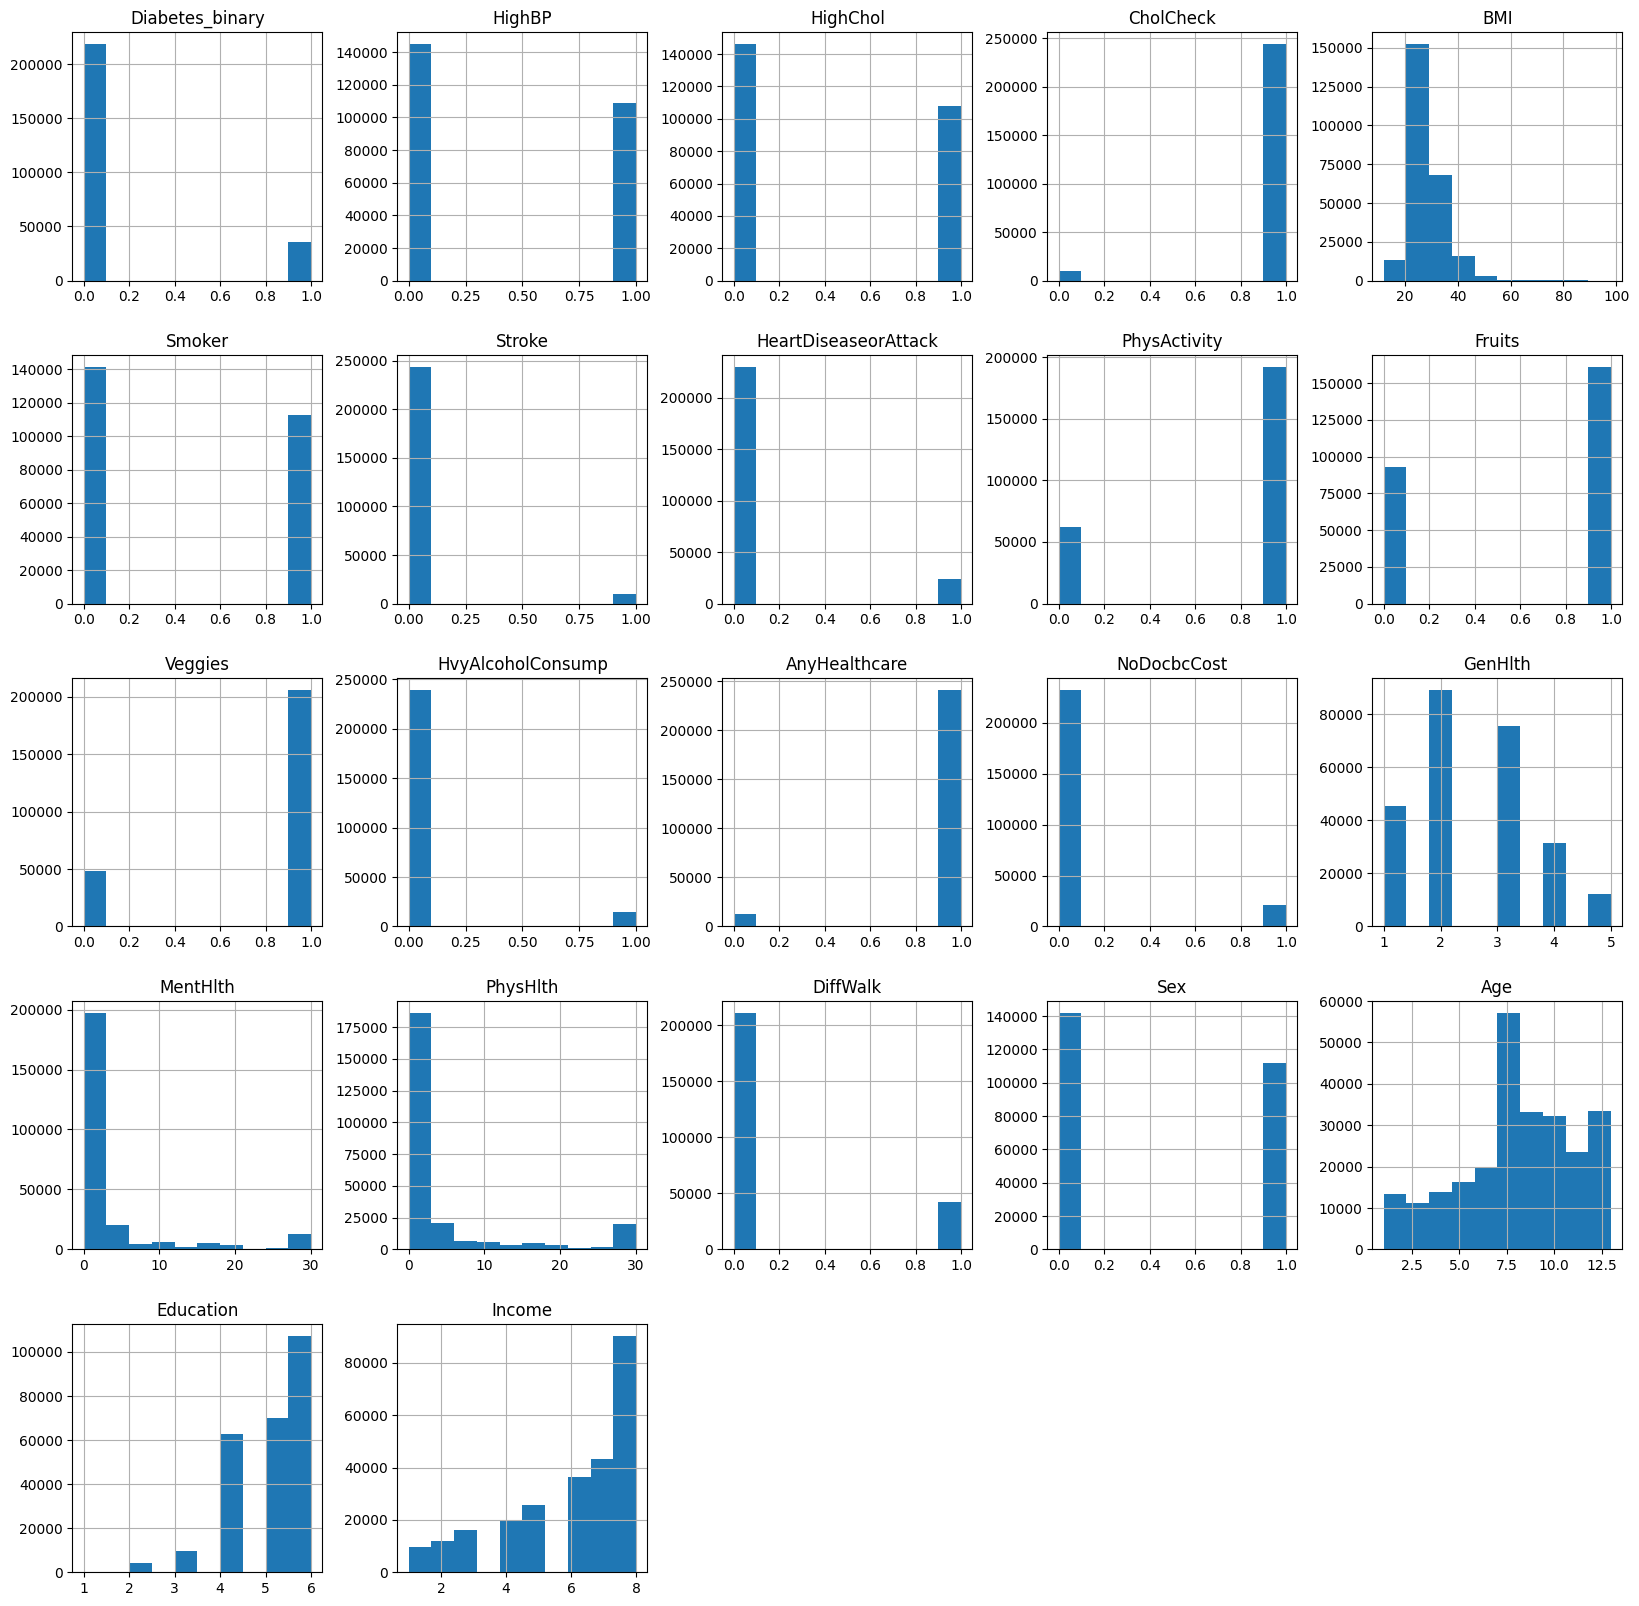

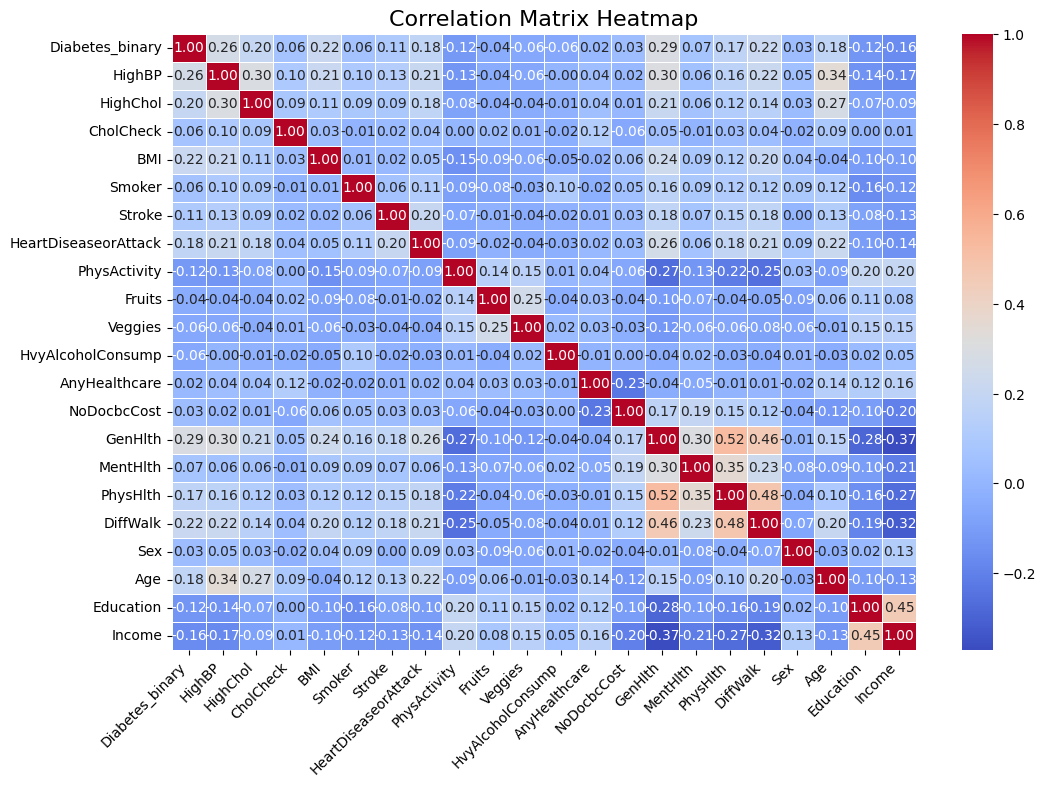

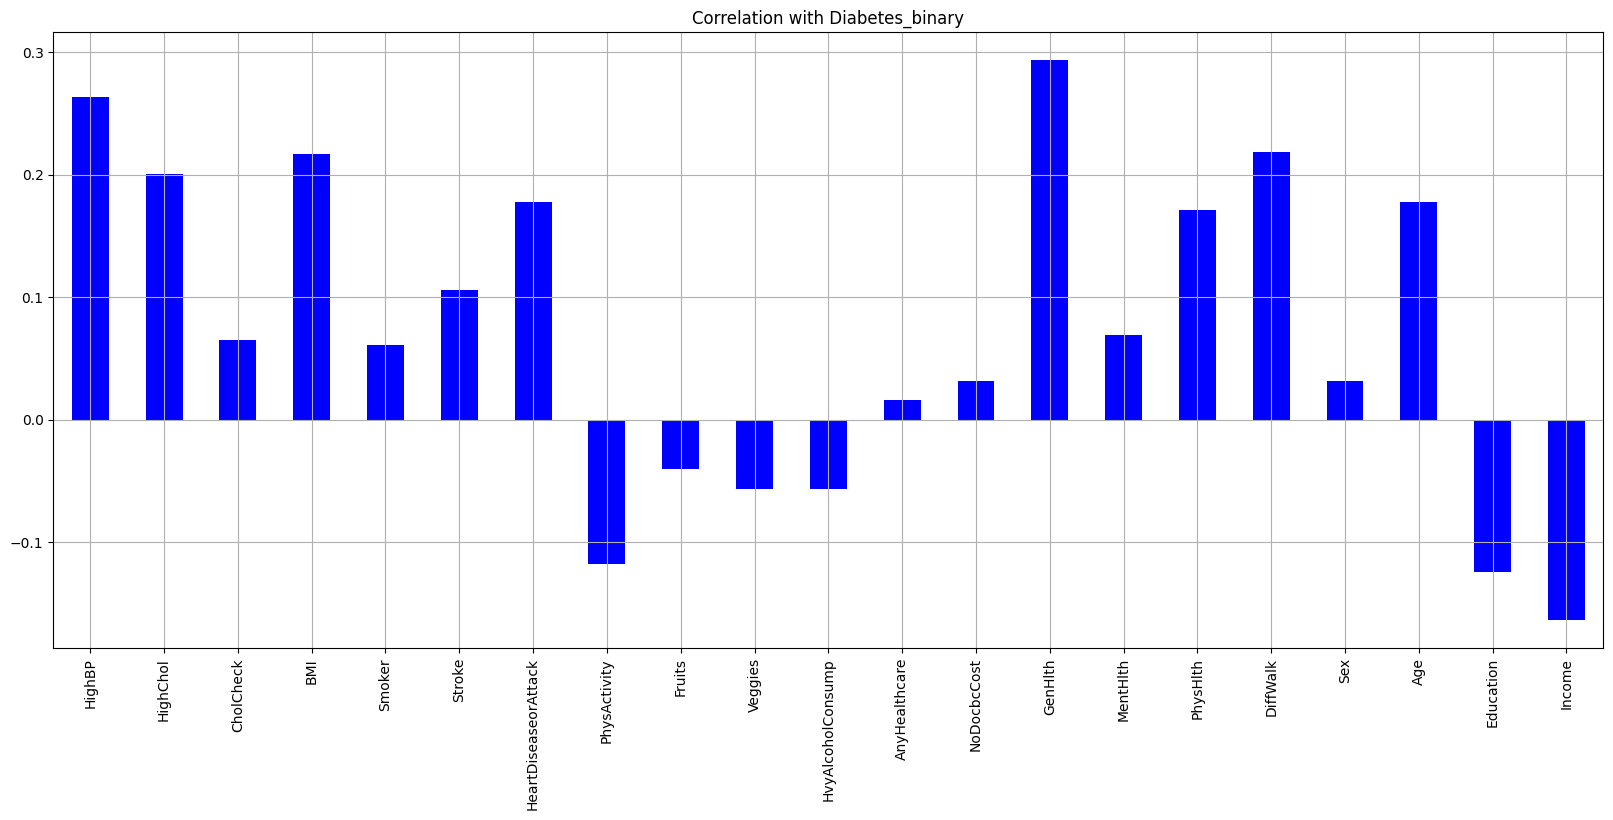

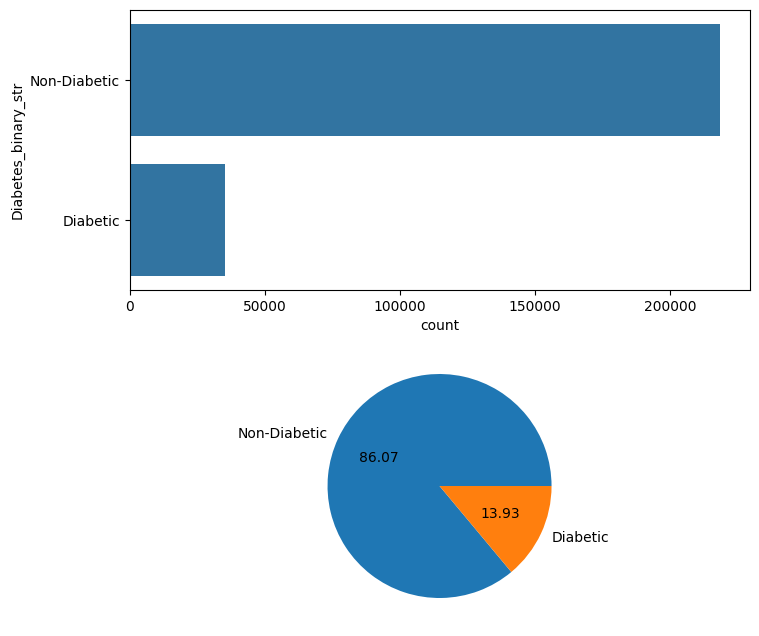

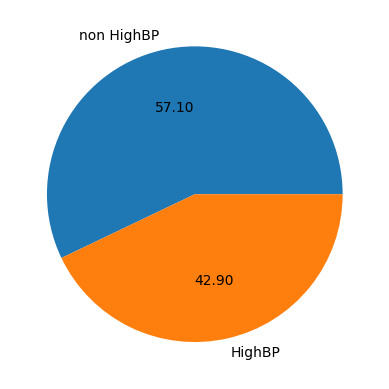

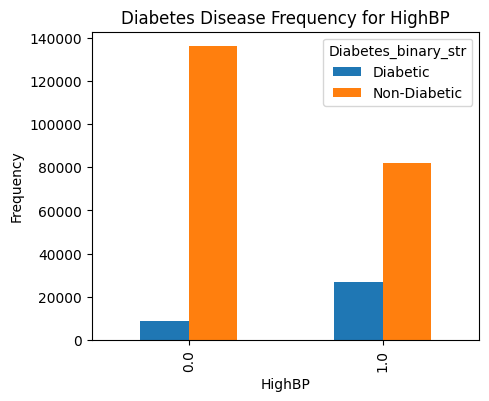

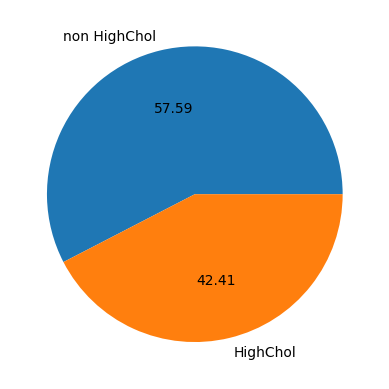

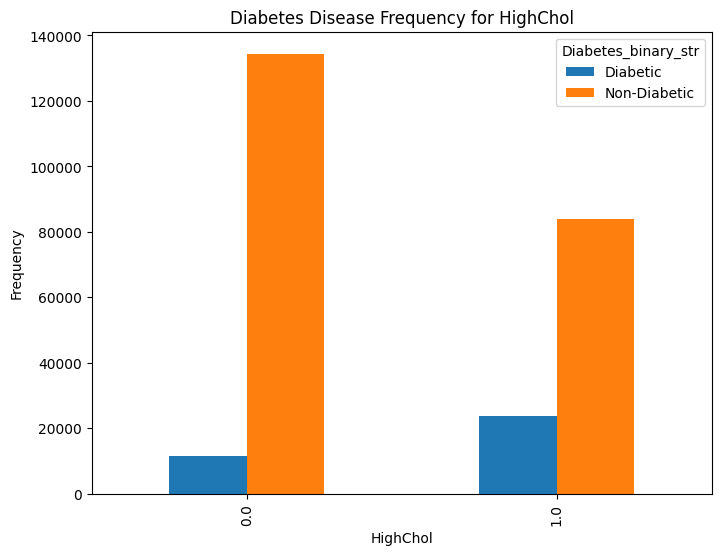

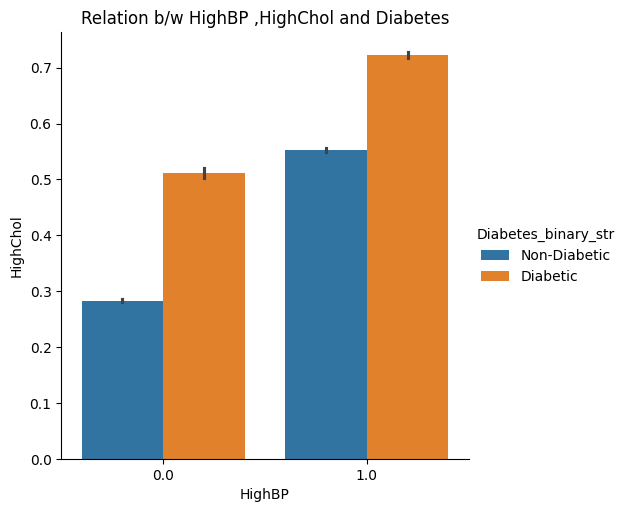

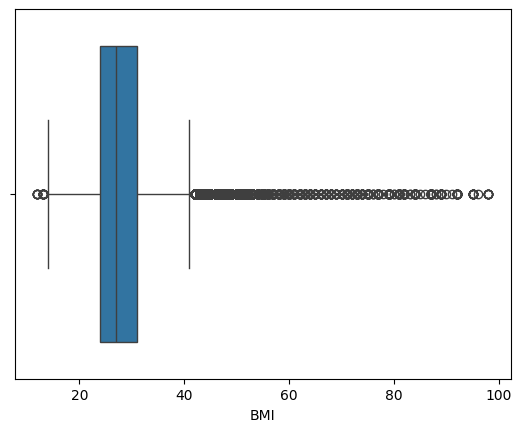

len of BMI_2 :  238083


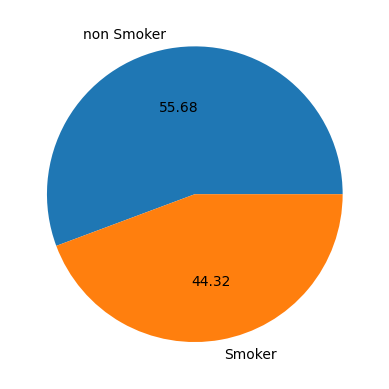

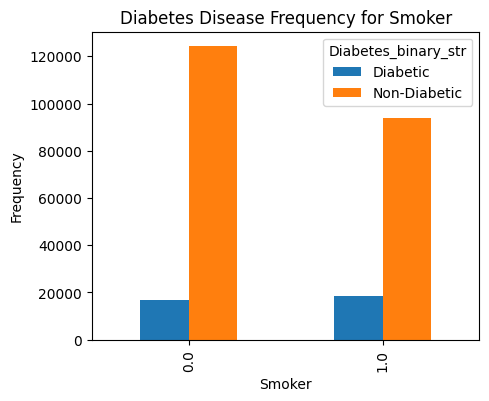

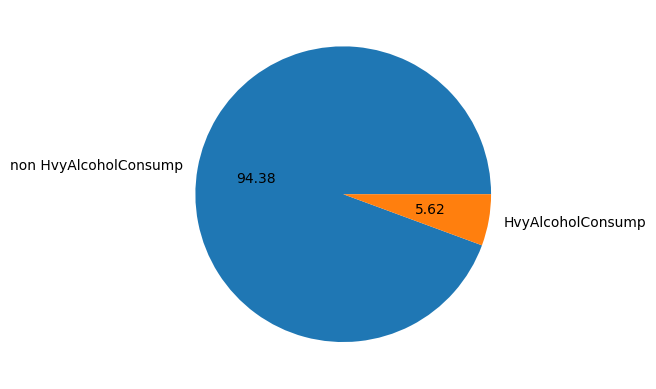

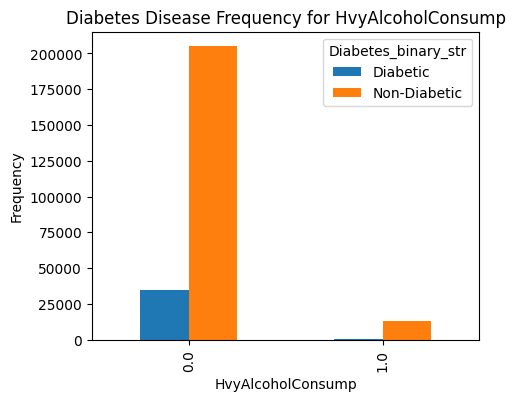

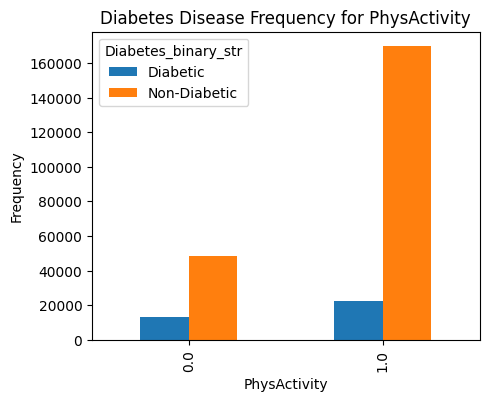

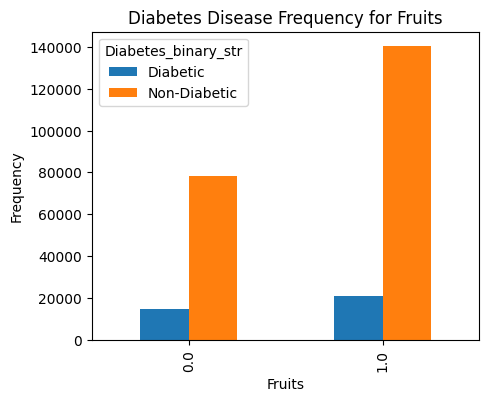

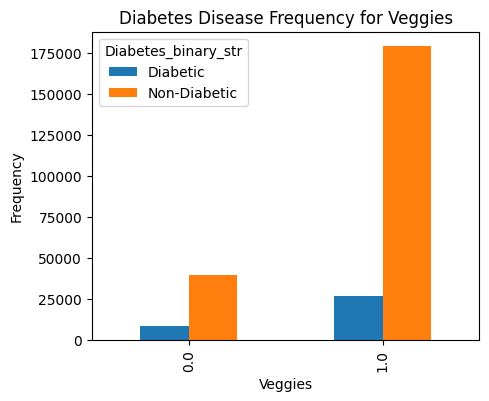

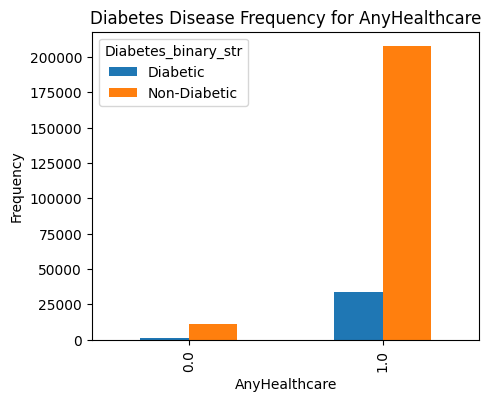

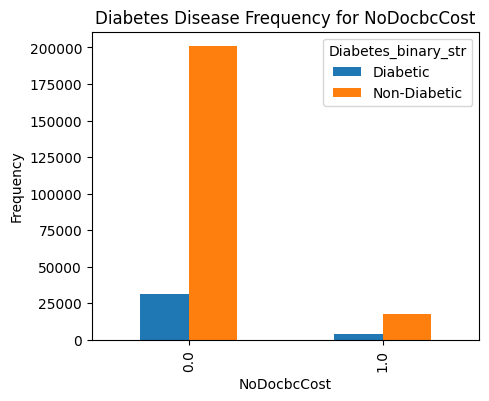

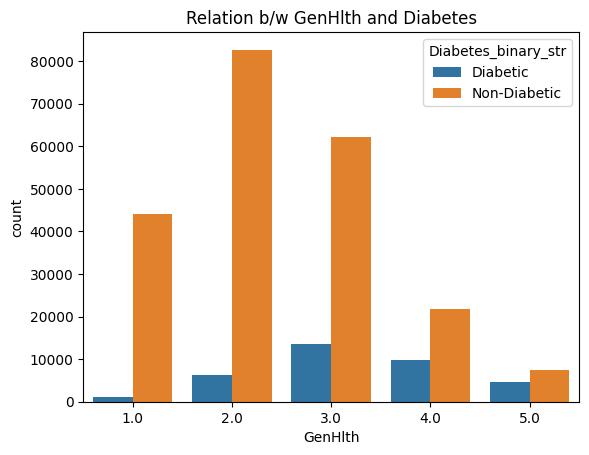

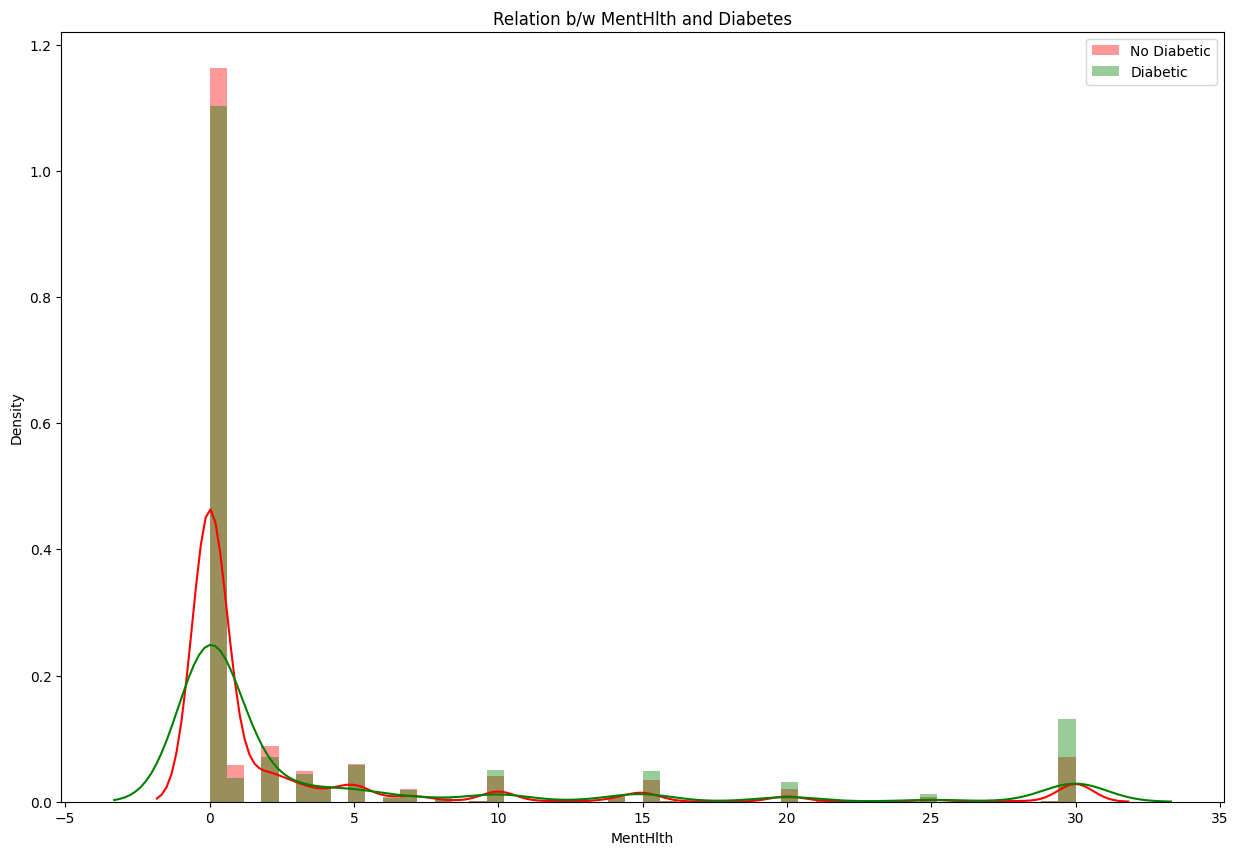

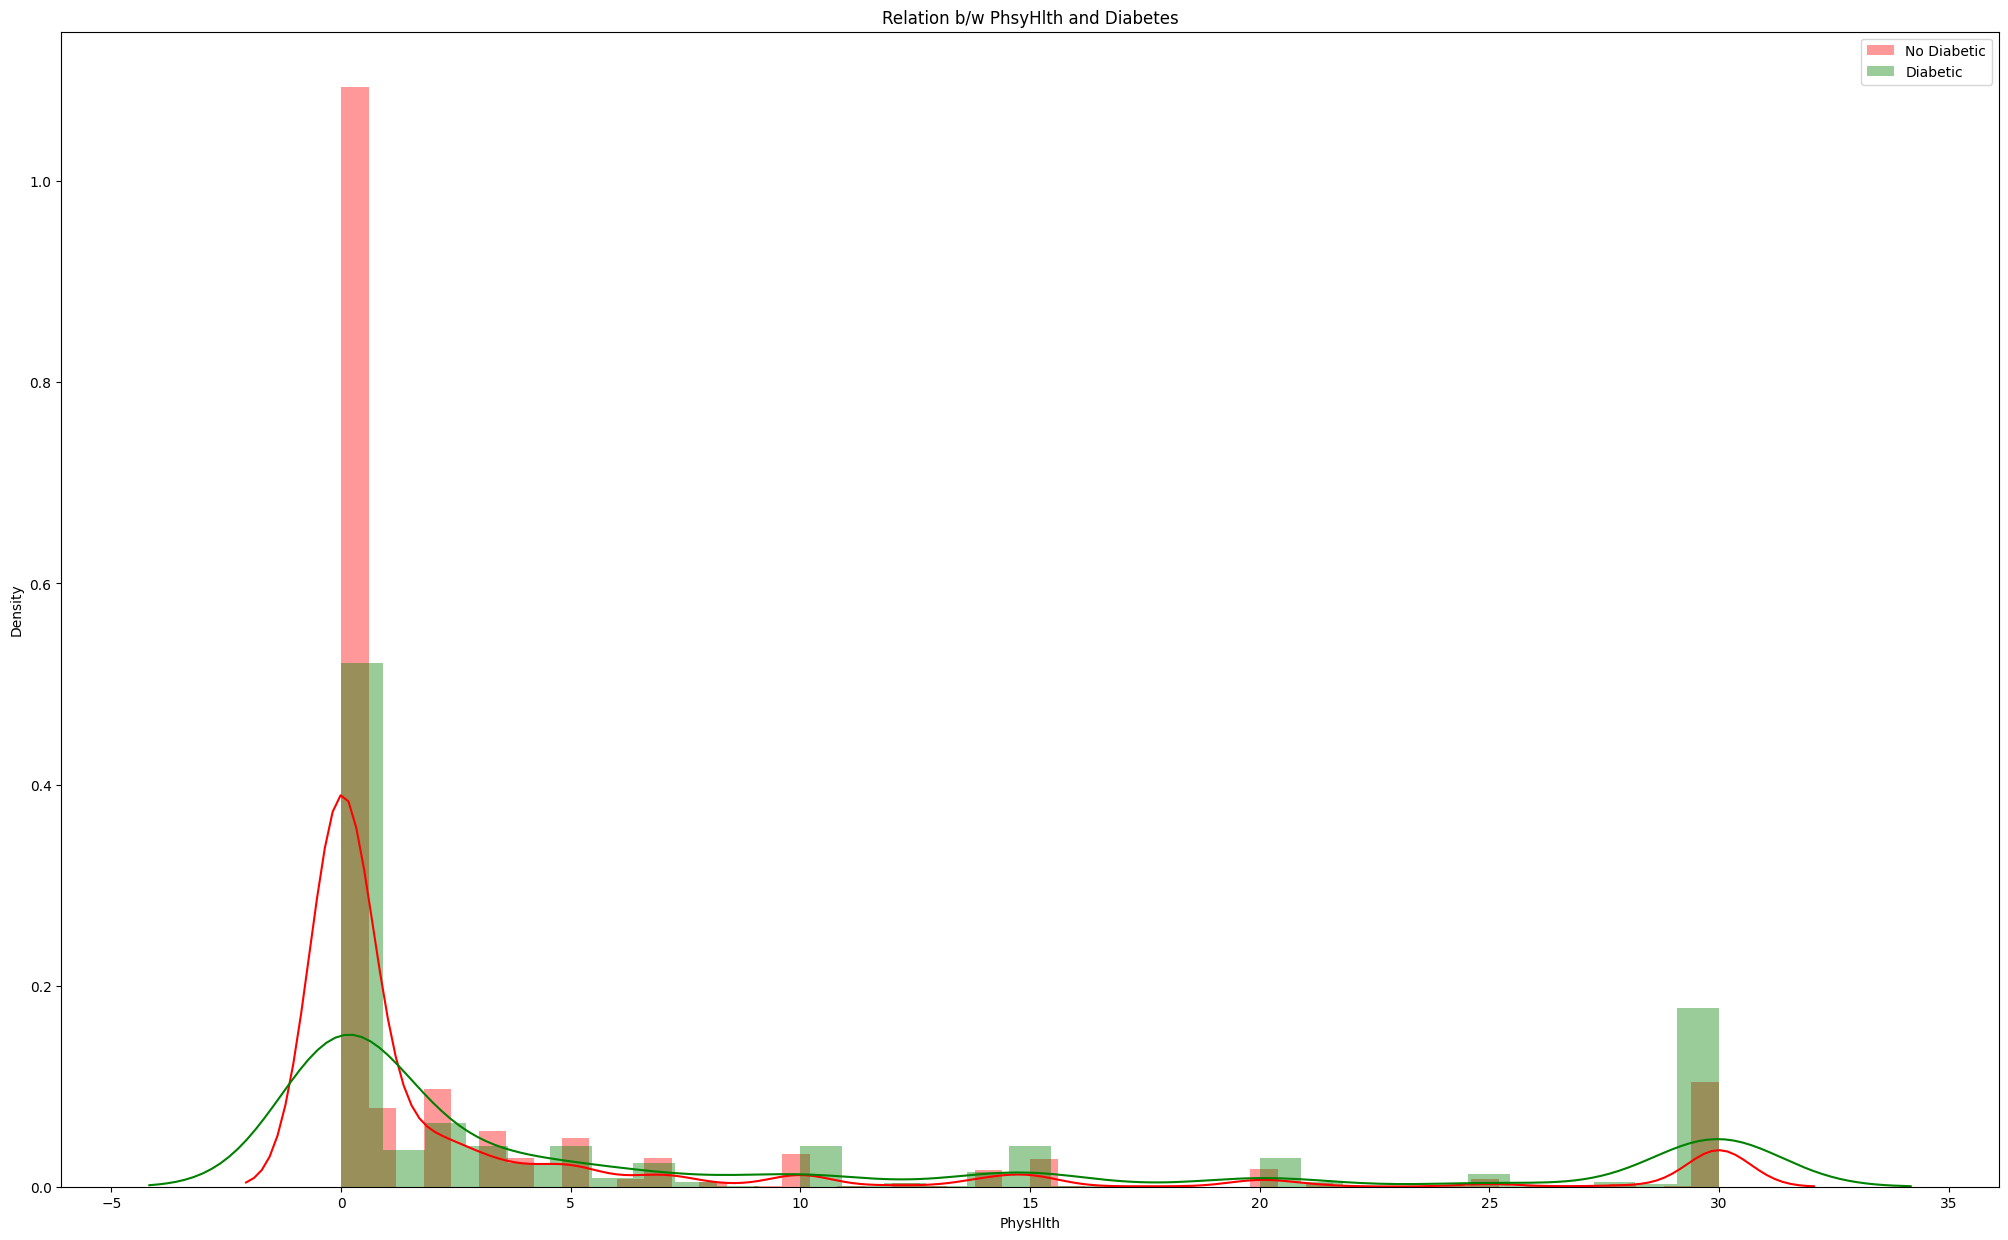

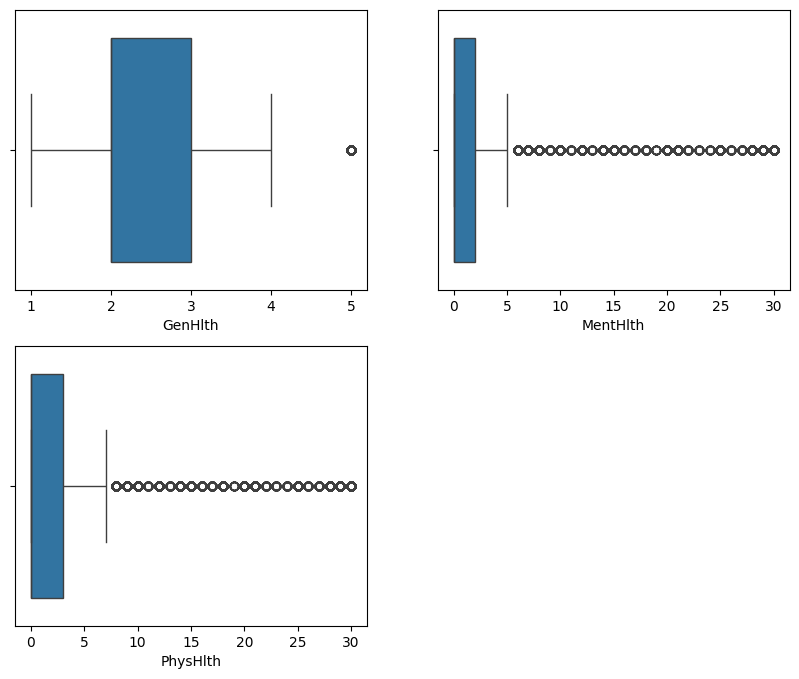

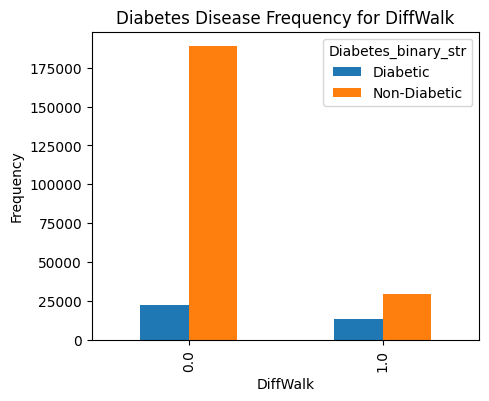

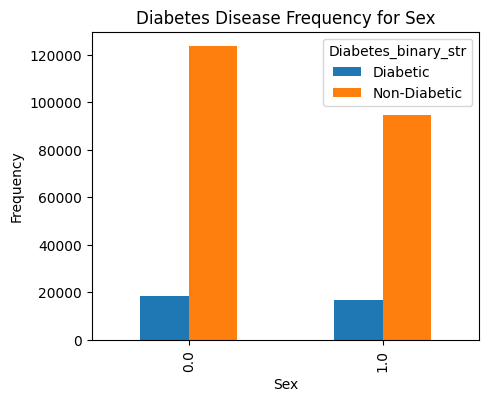

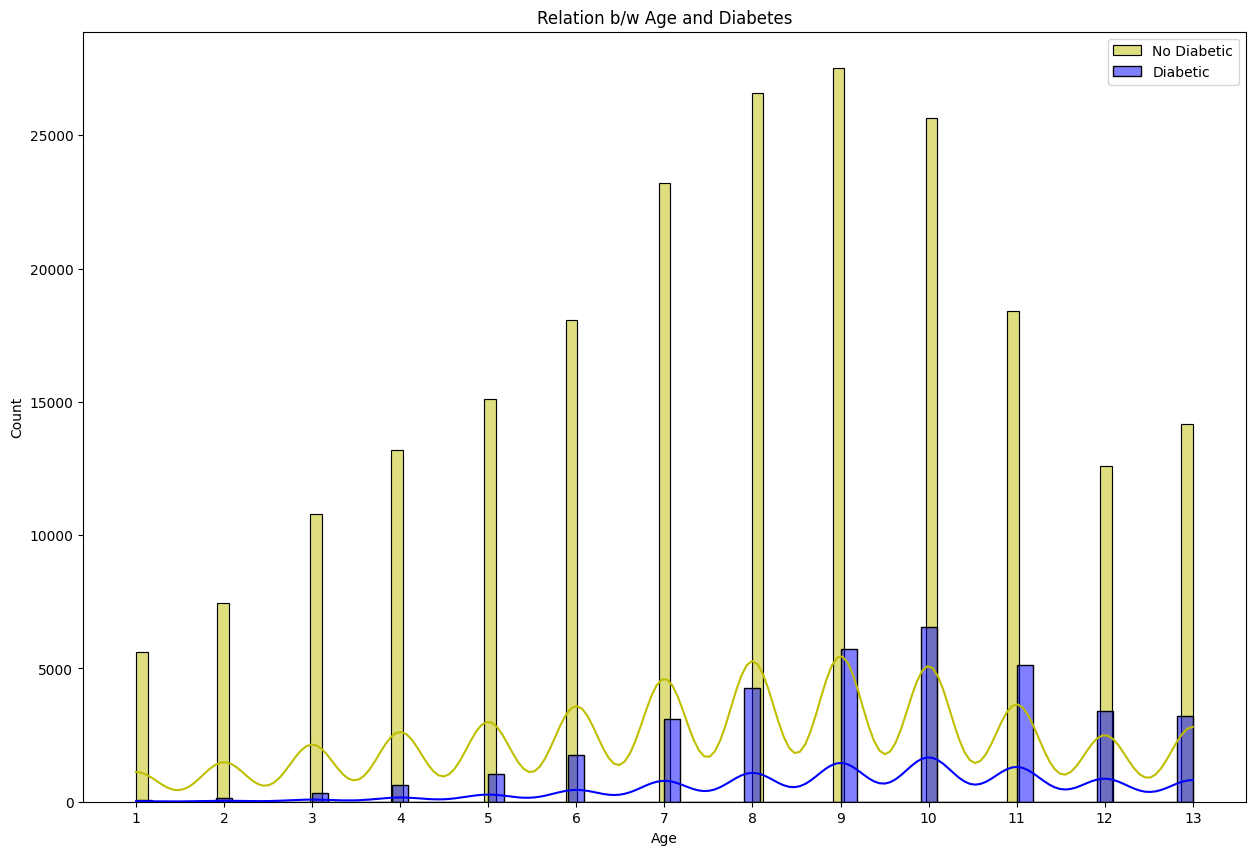

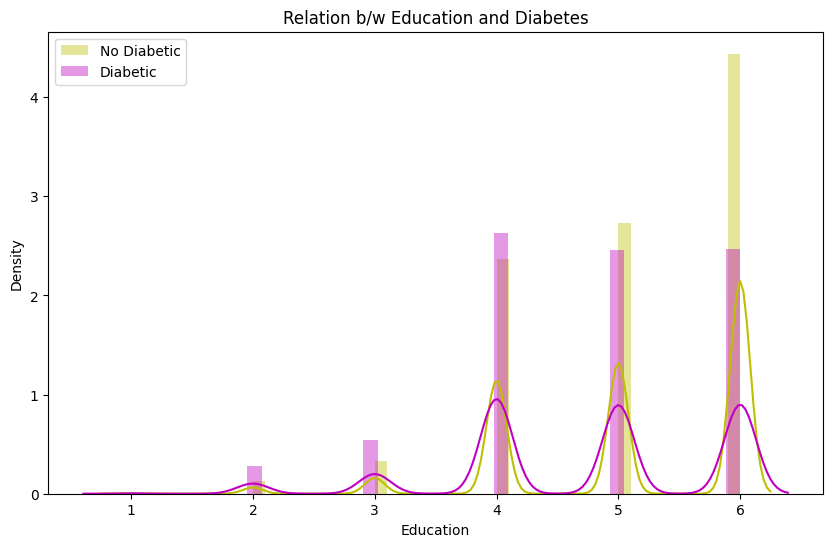

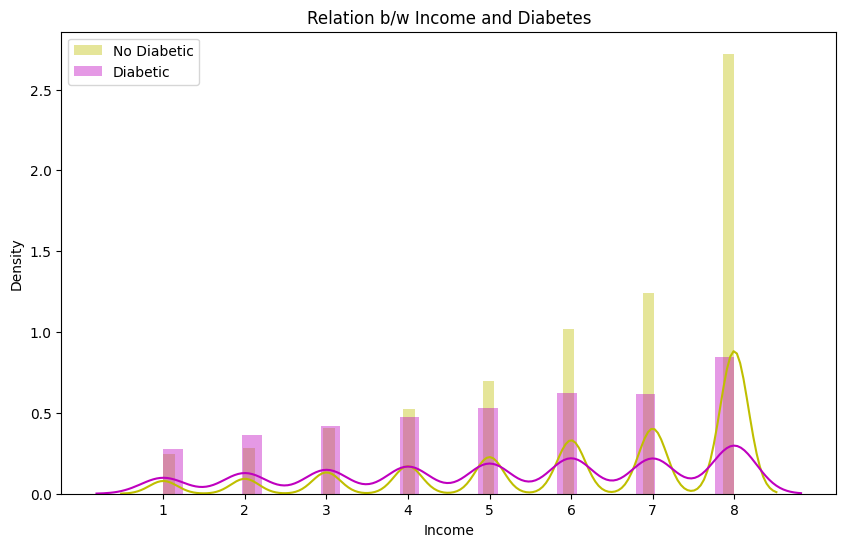

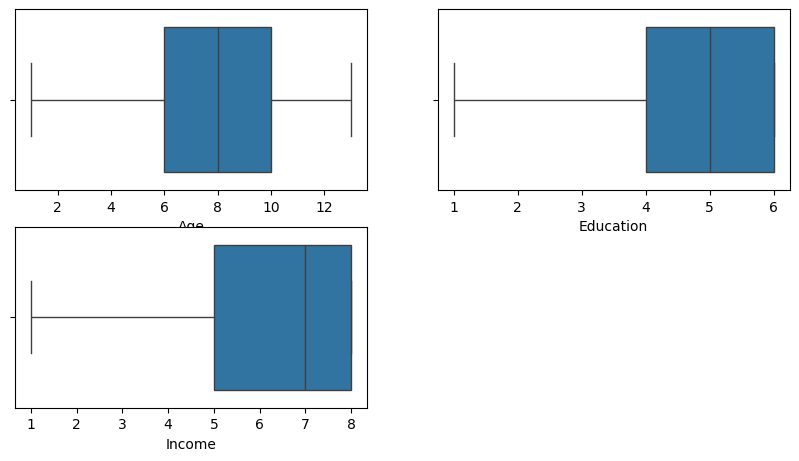

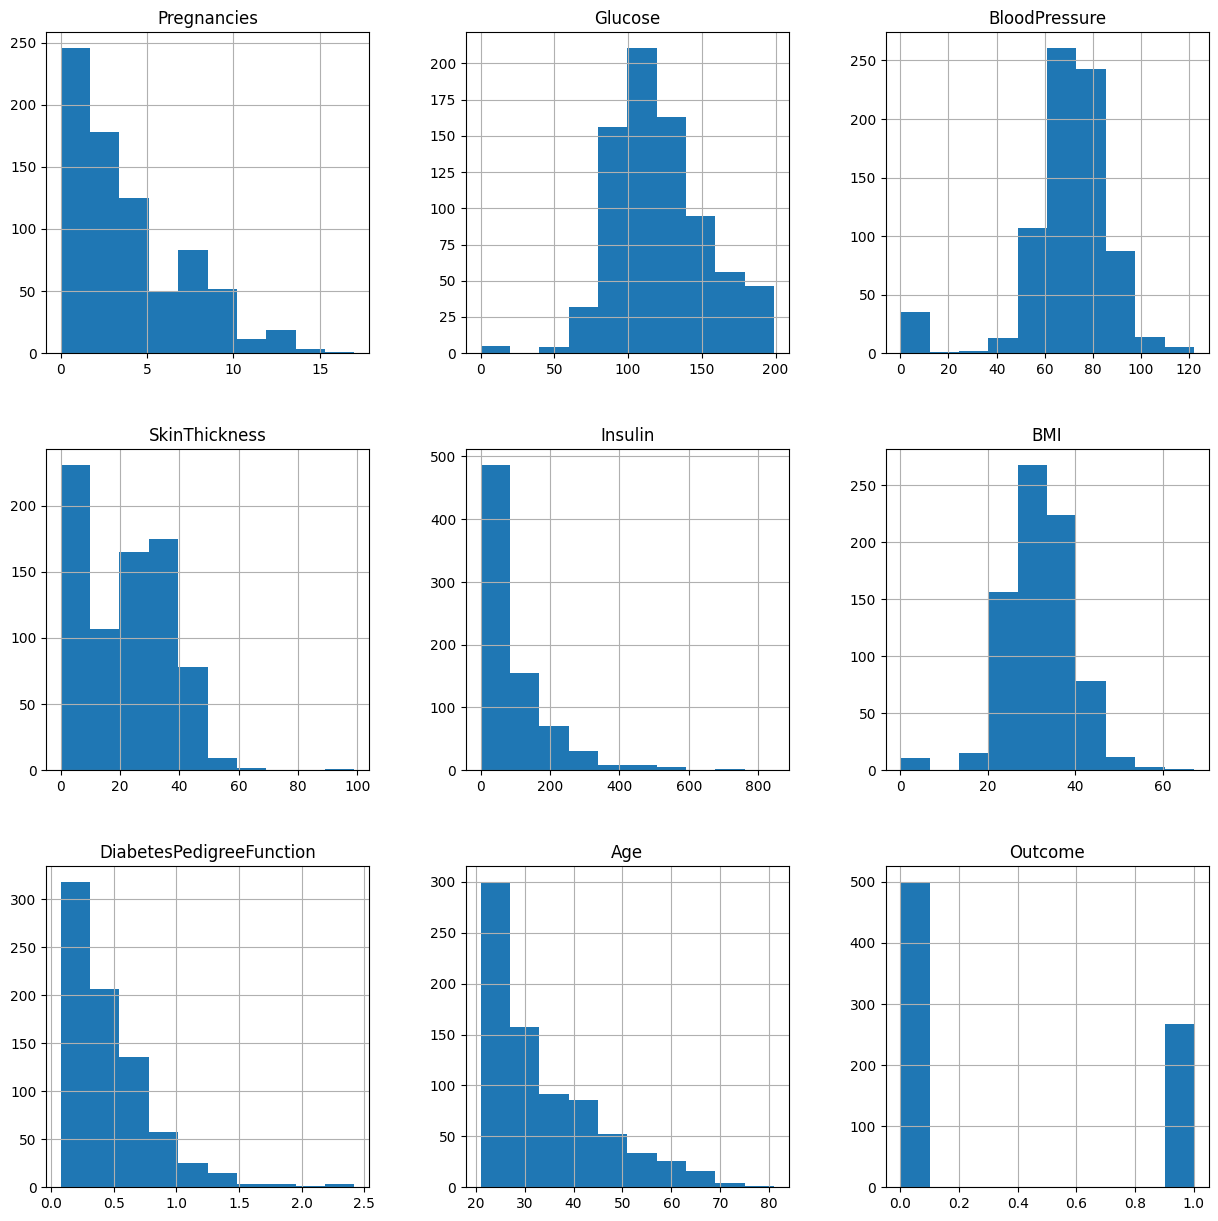

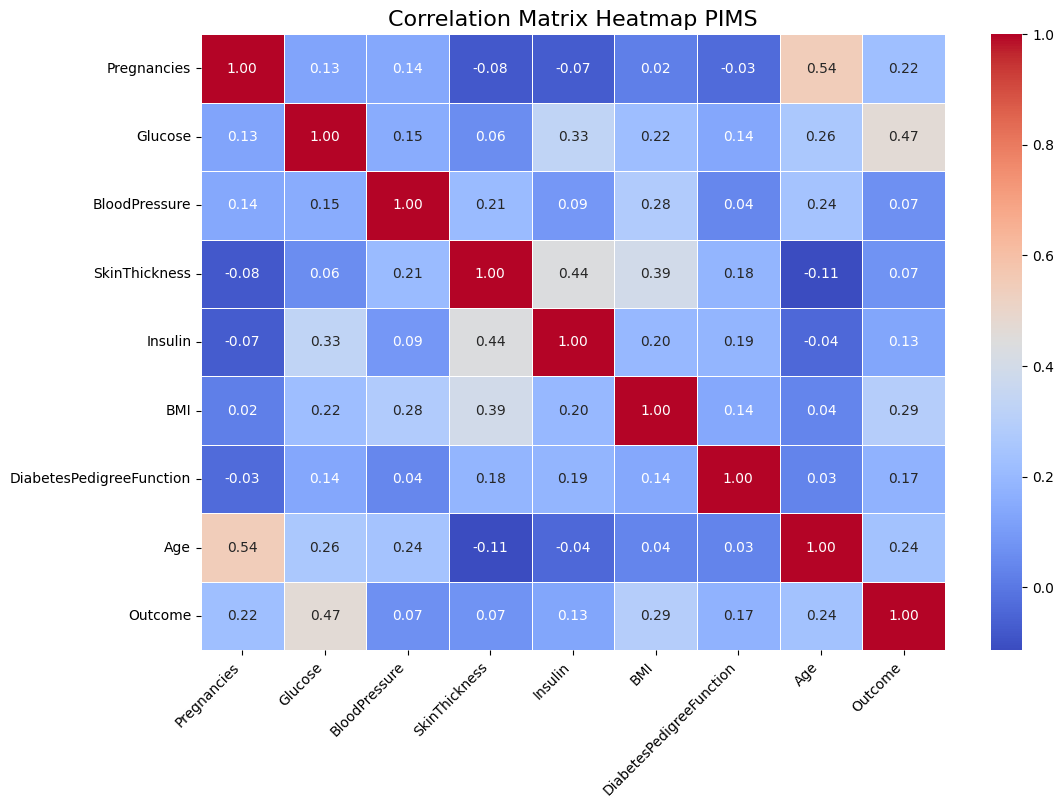

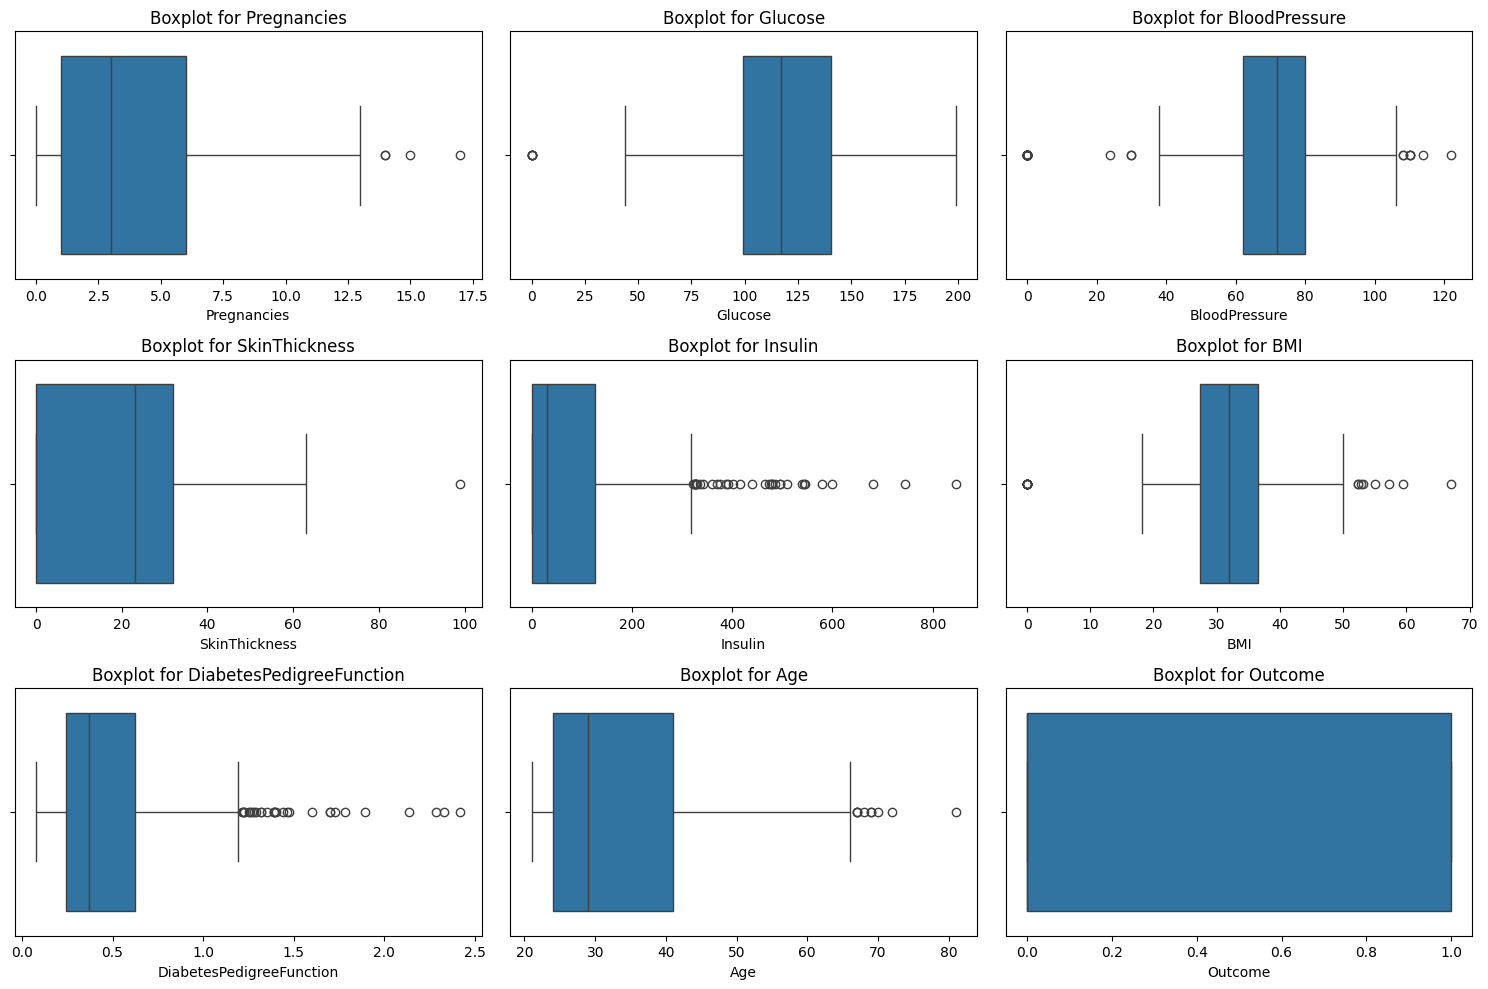

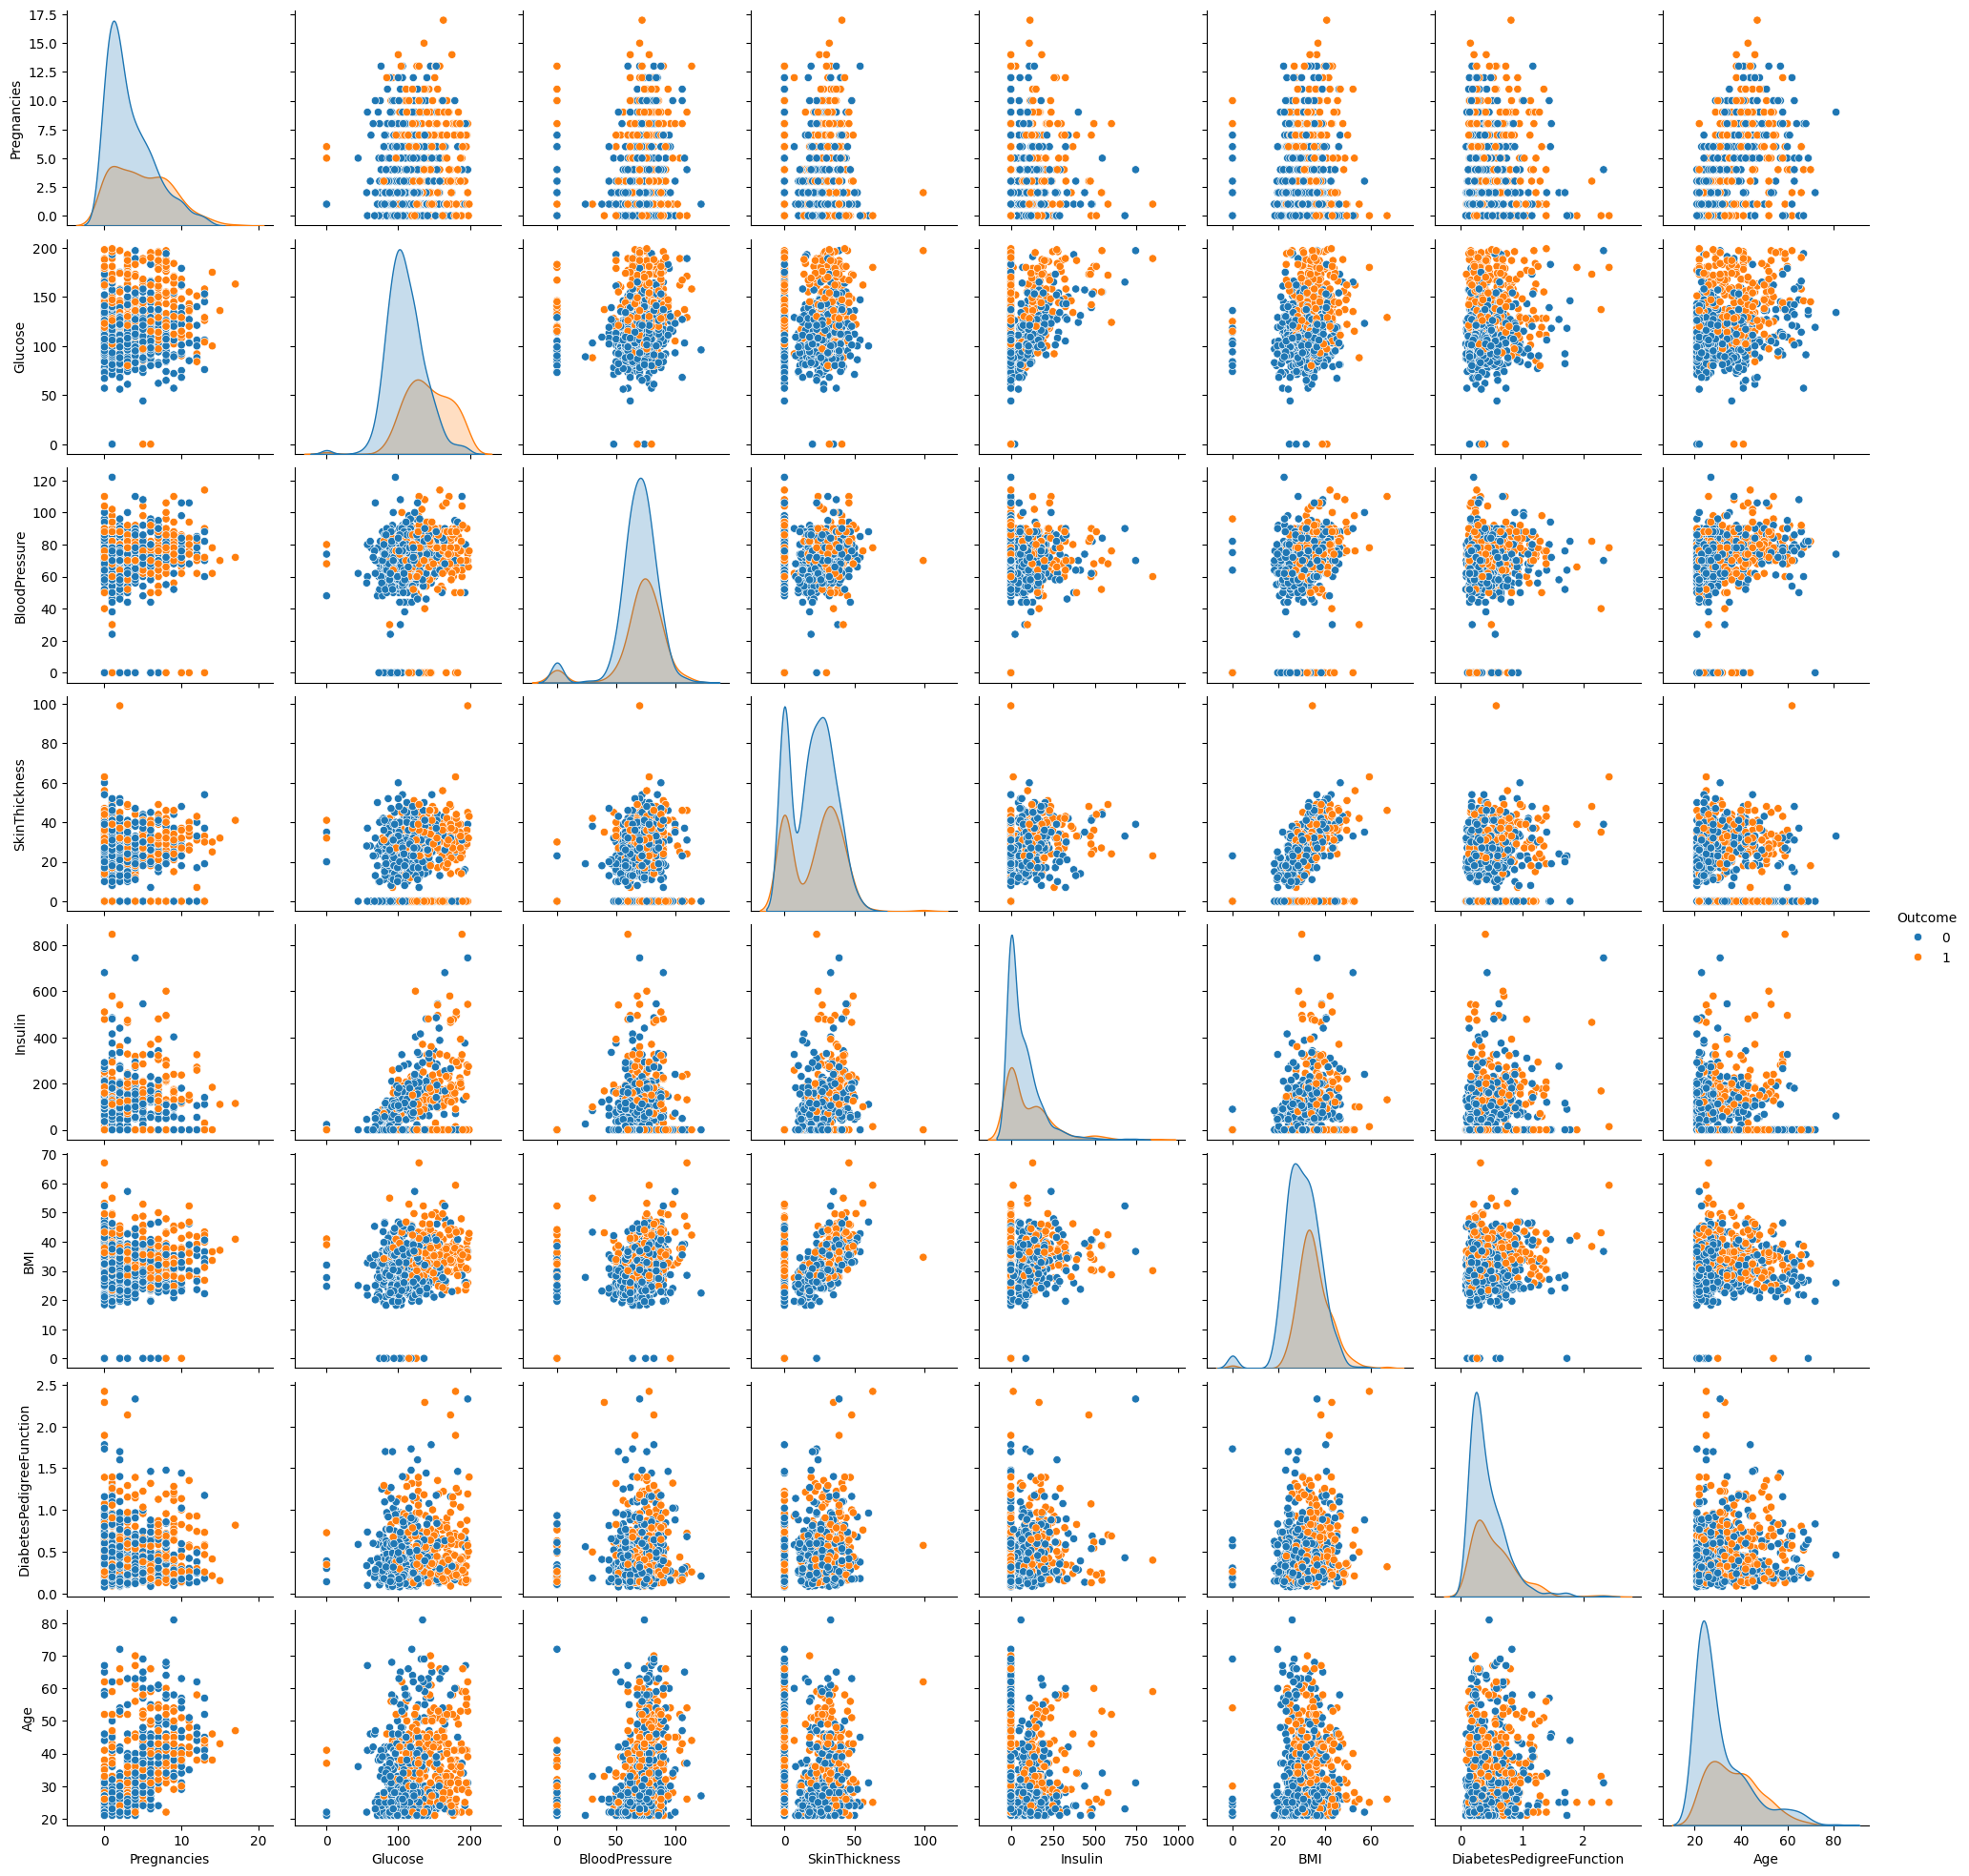

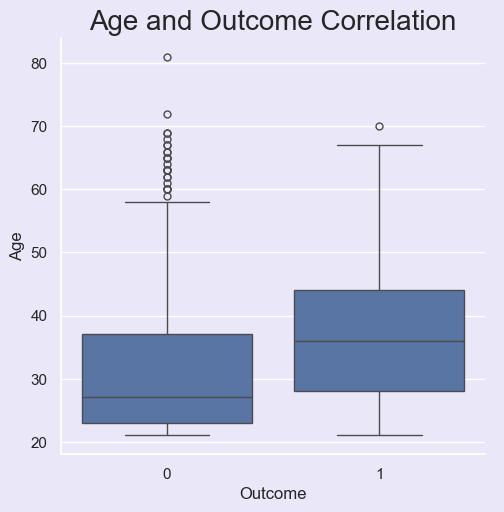

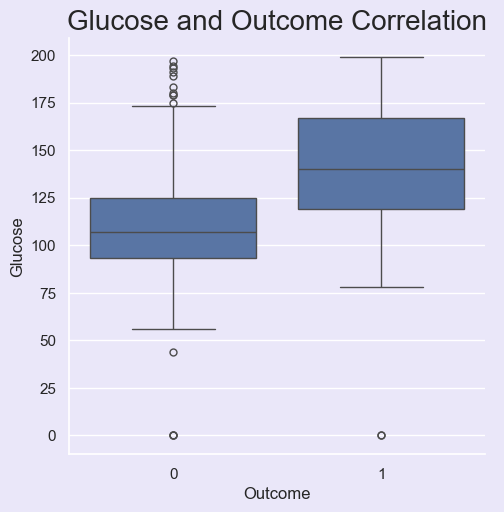

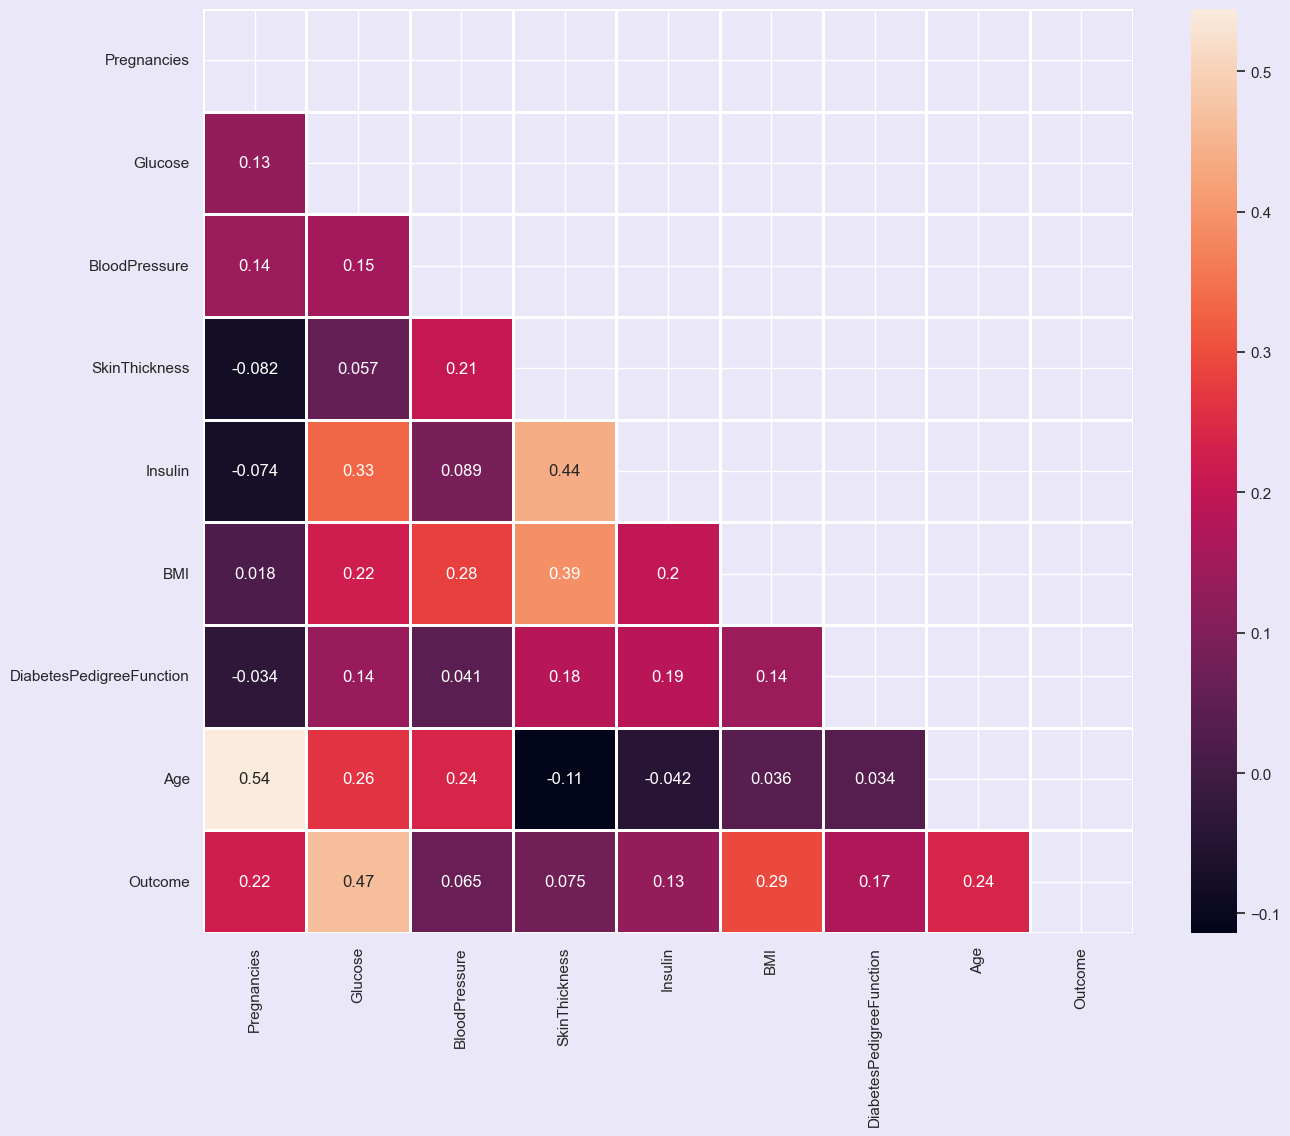

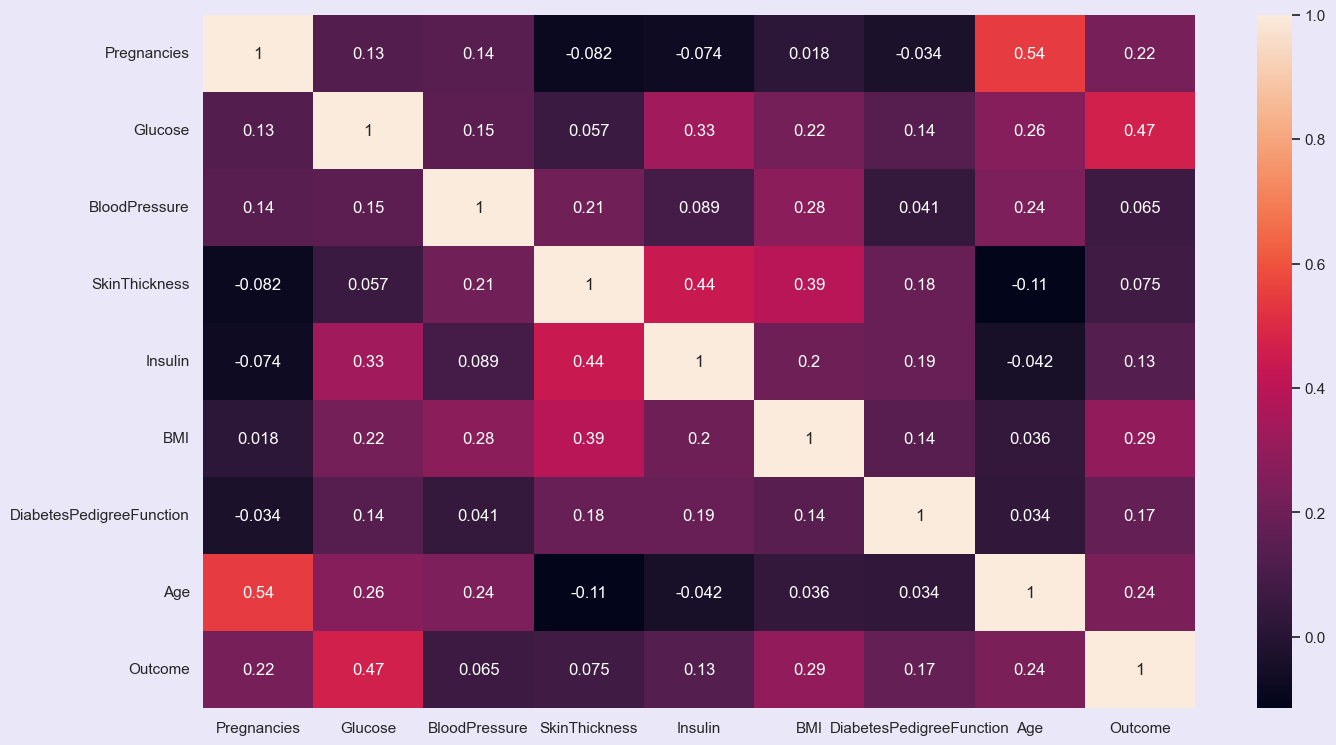

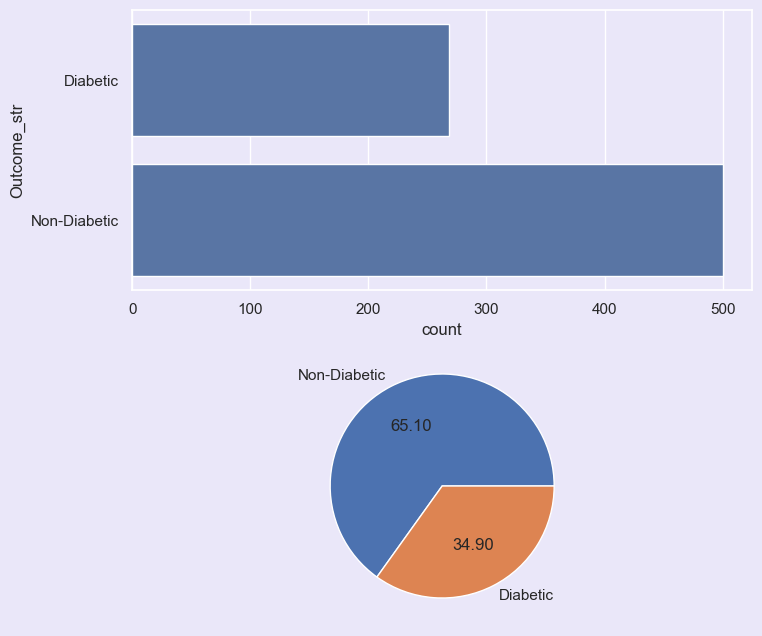

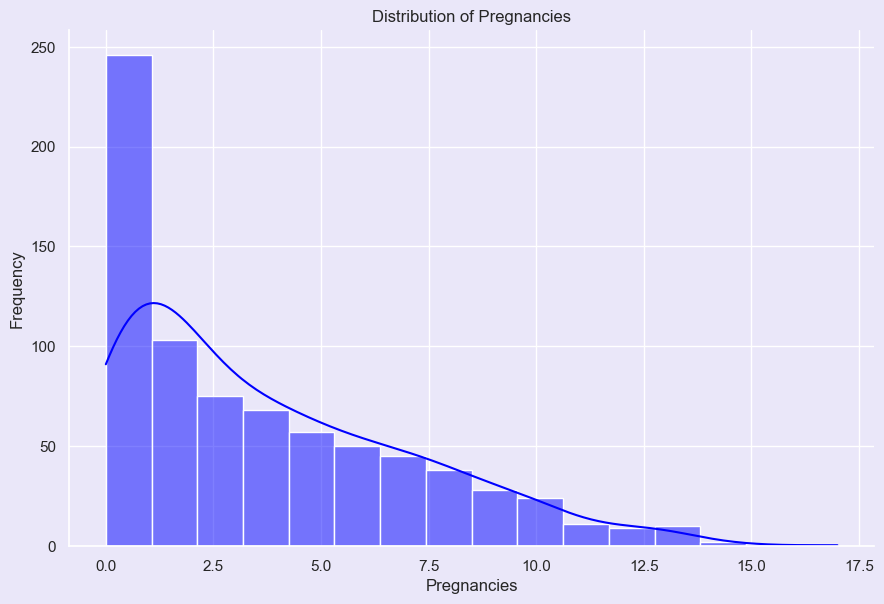

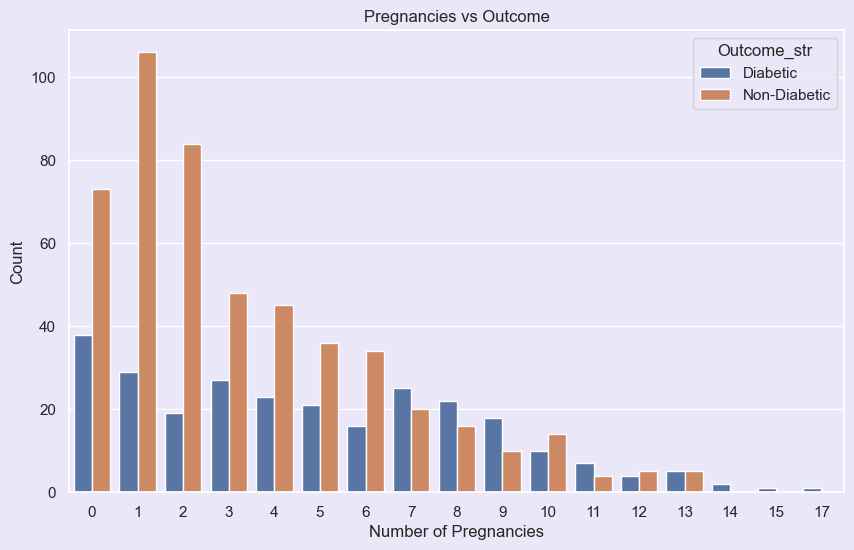

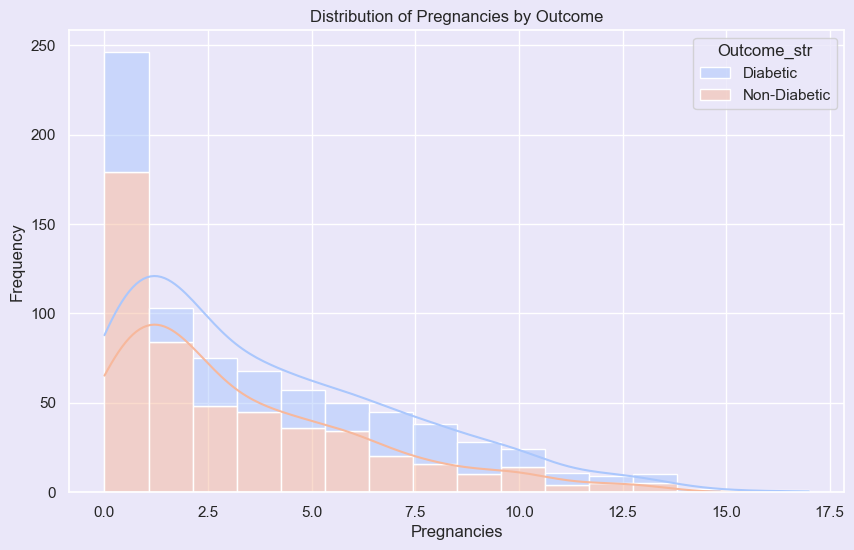

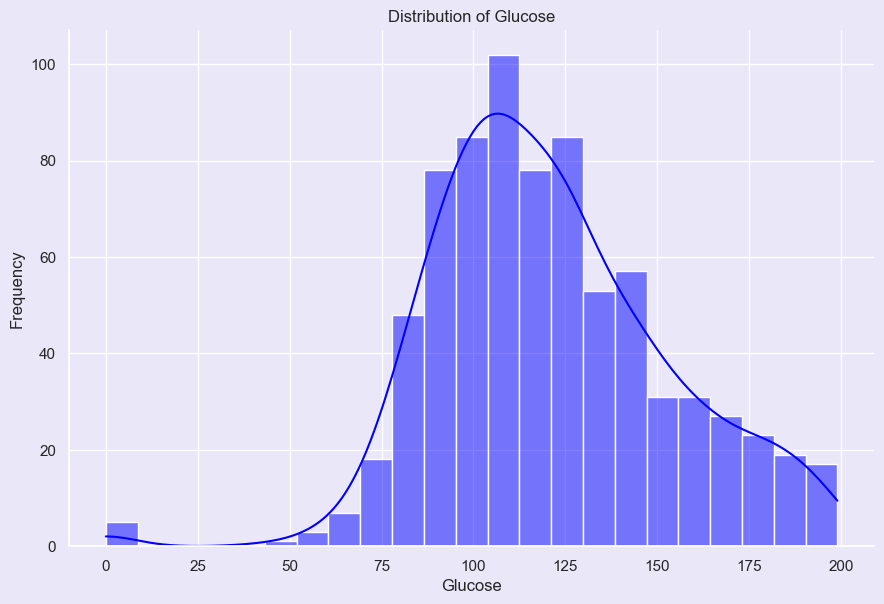

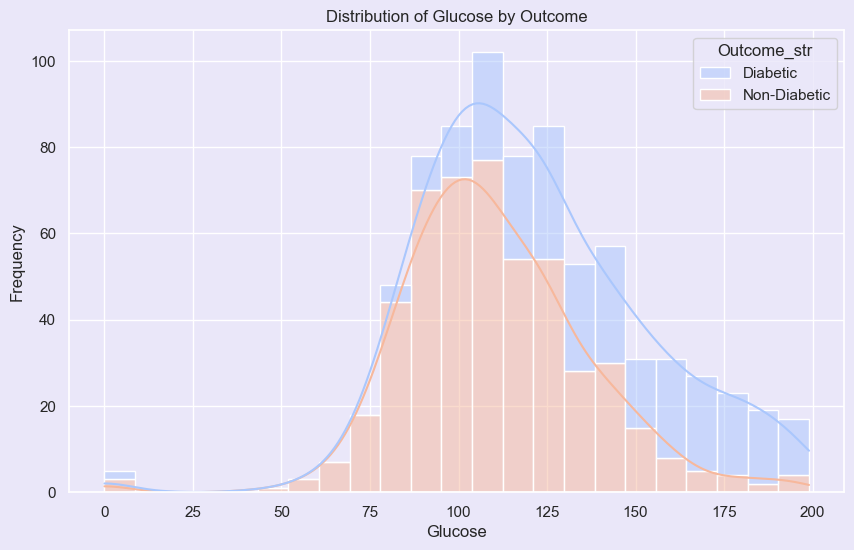

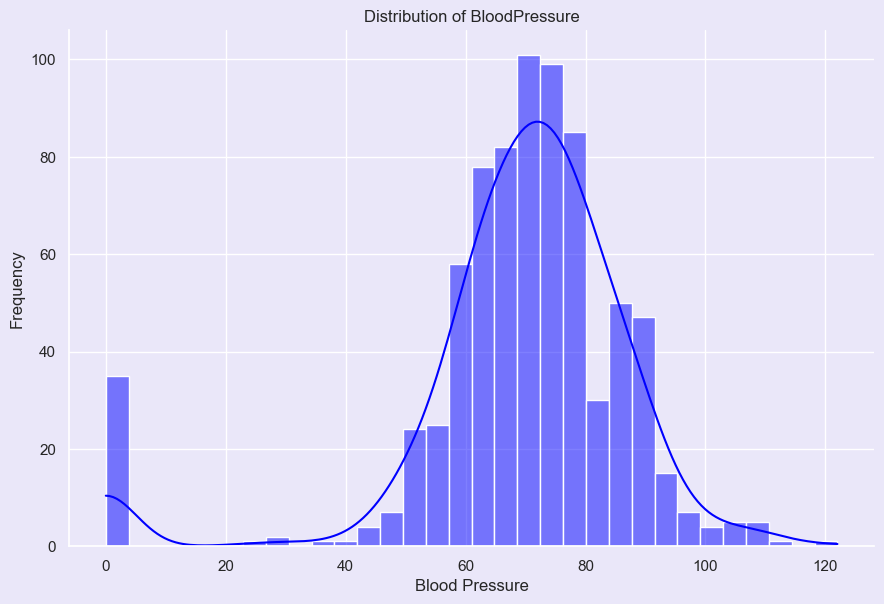

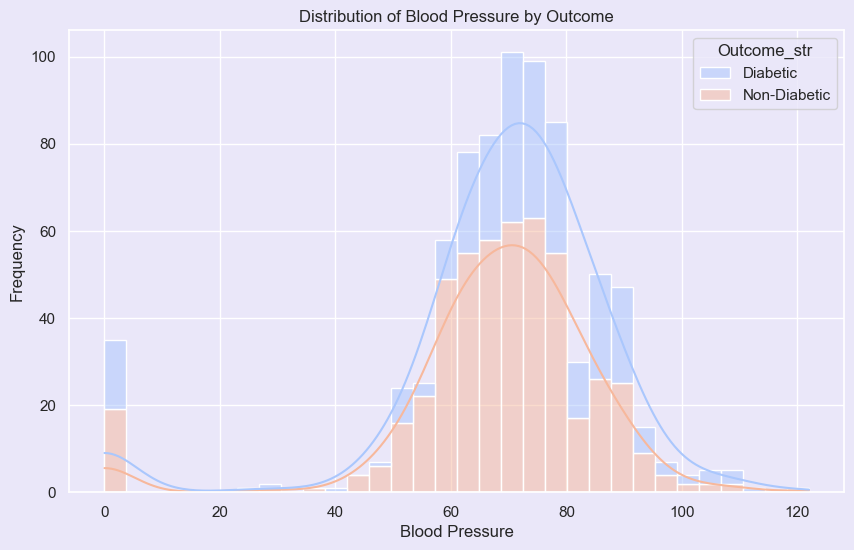

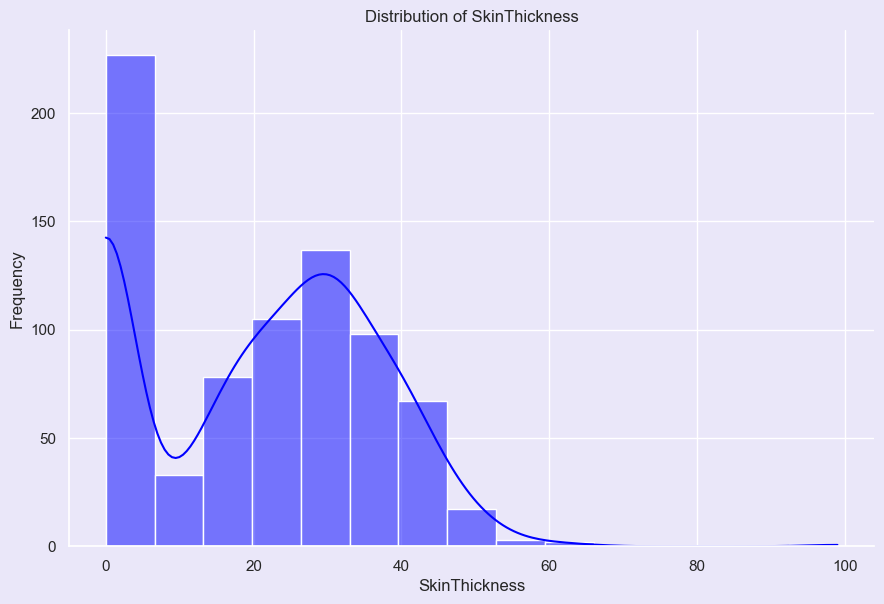

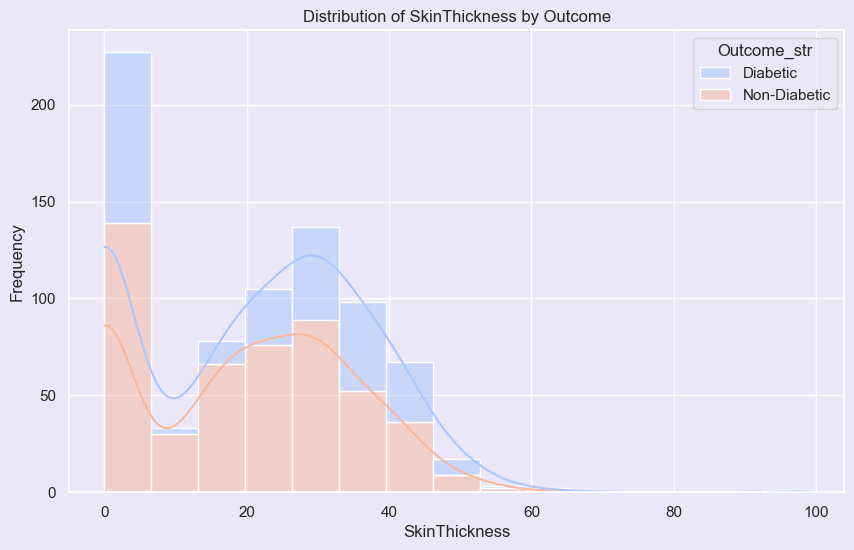

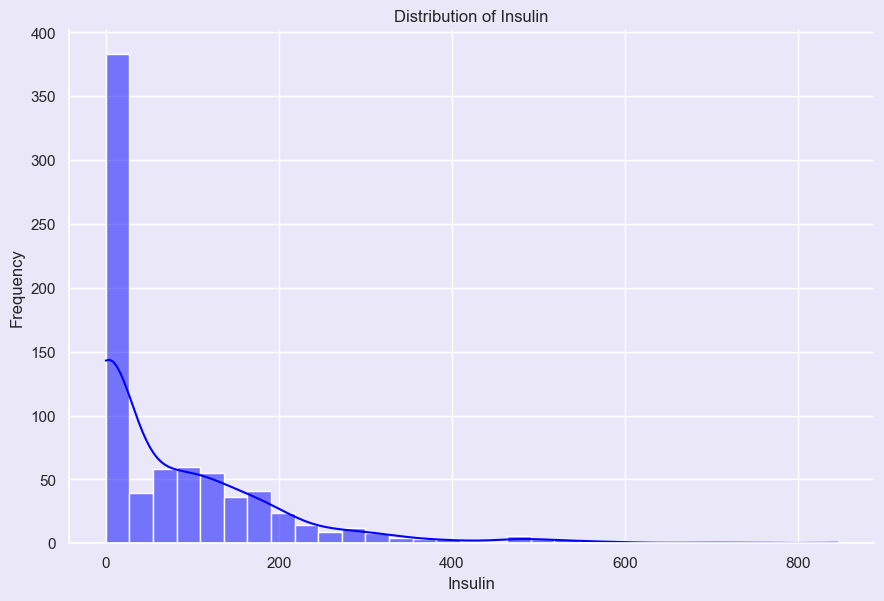

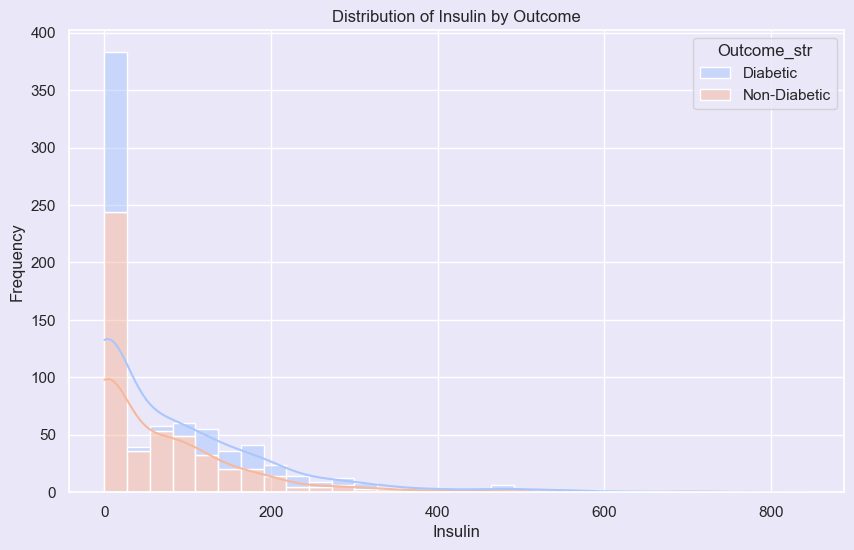

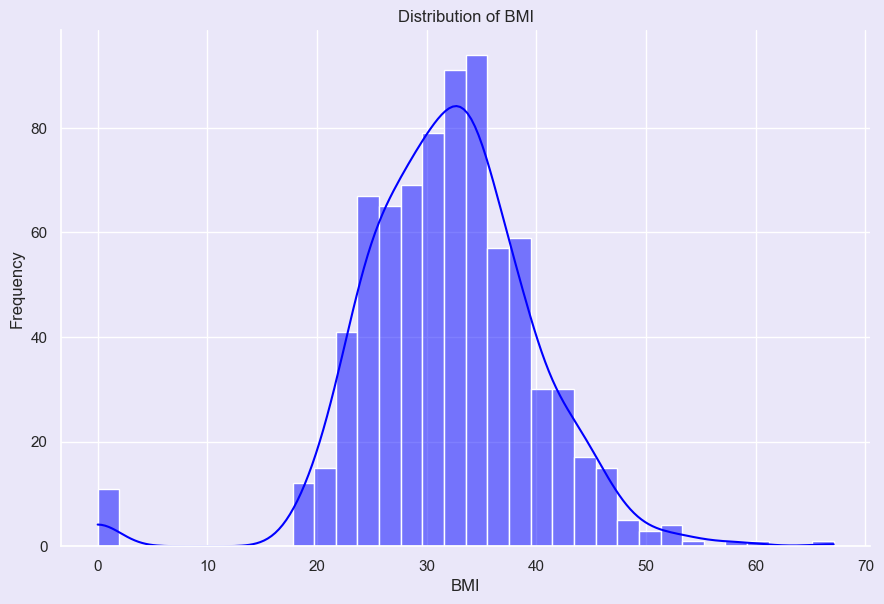

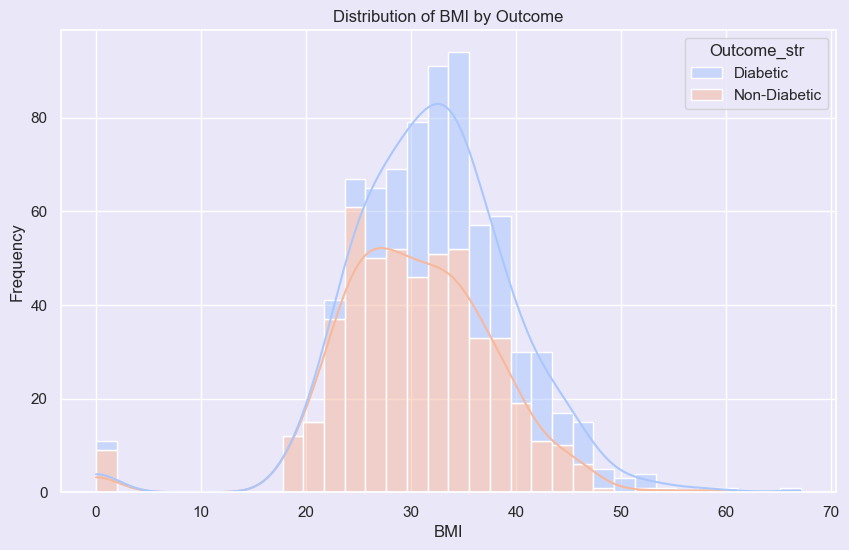

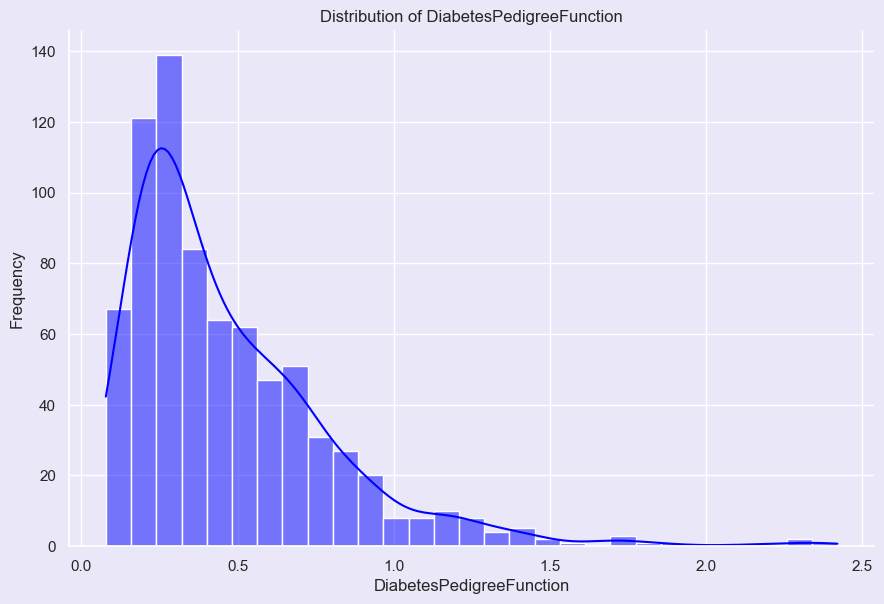

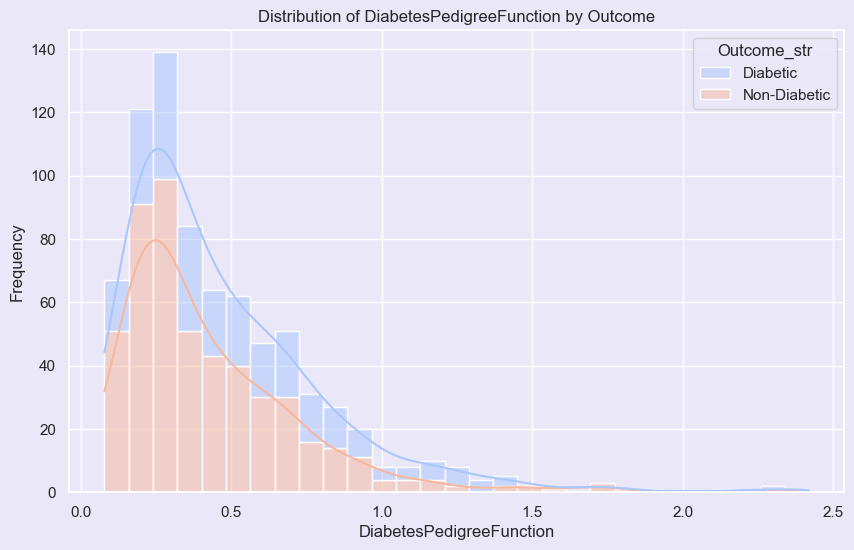

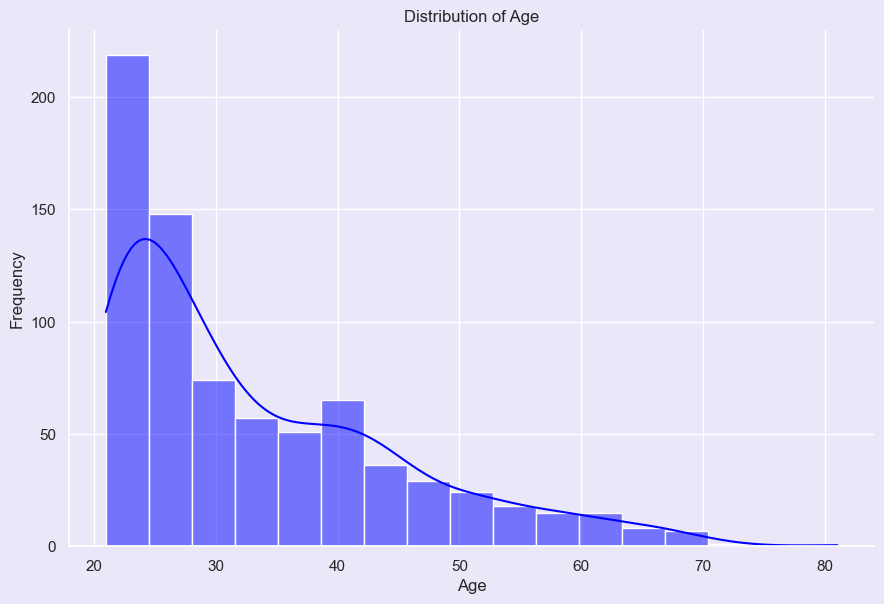

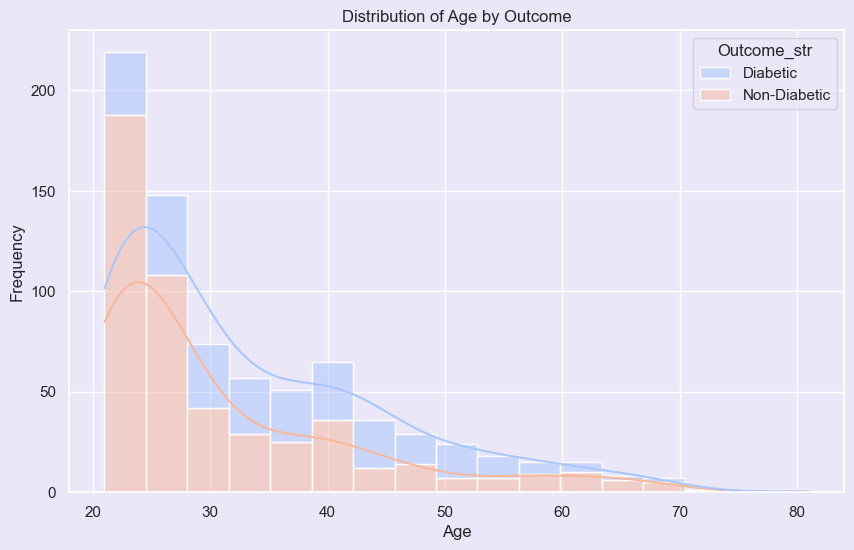

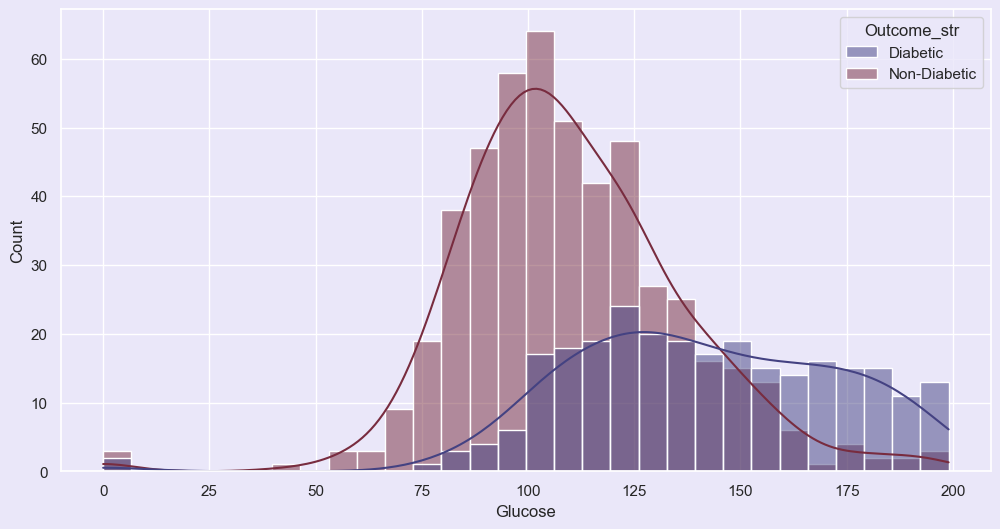

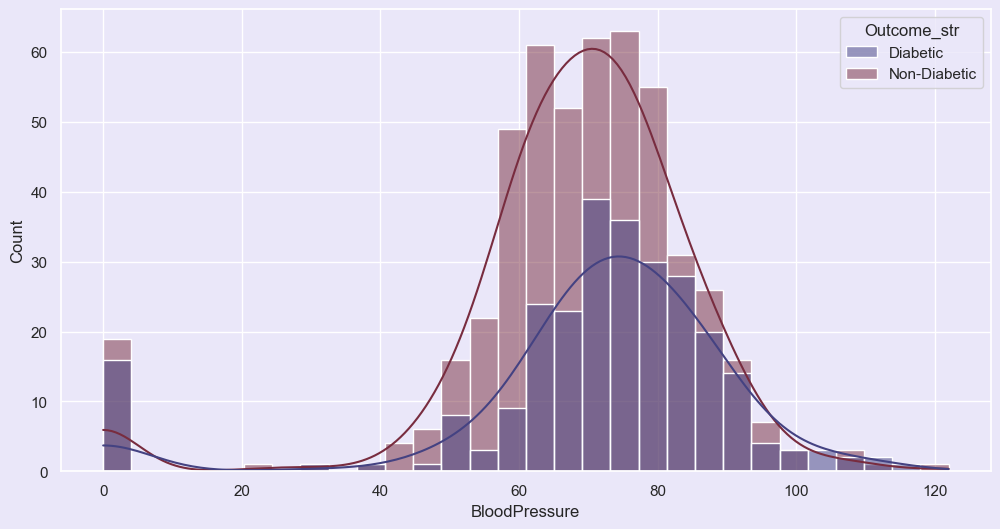

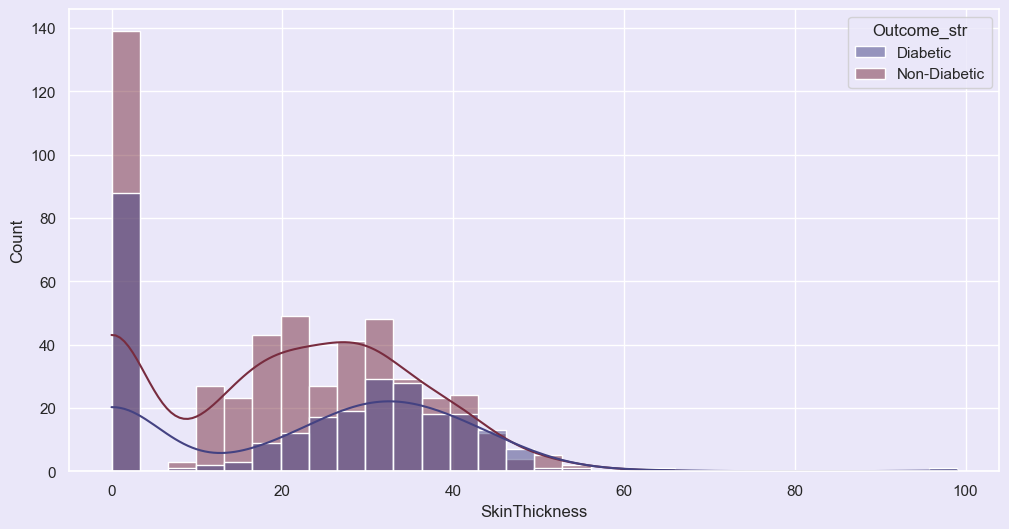

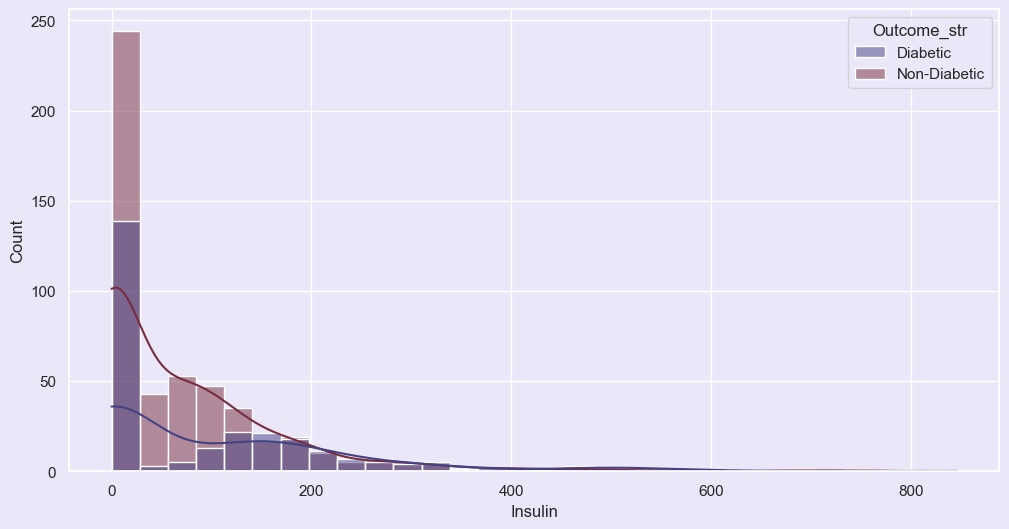

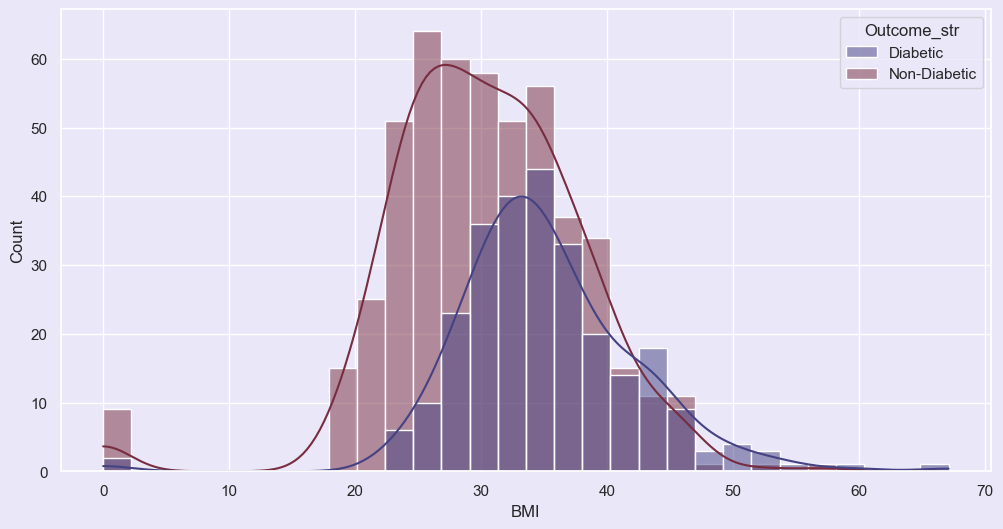

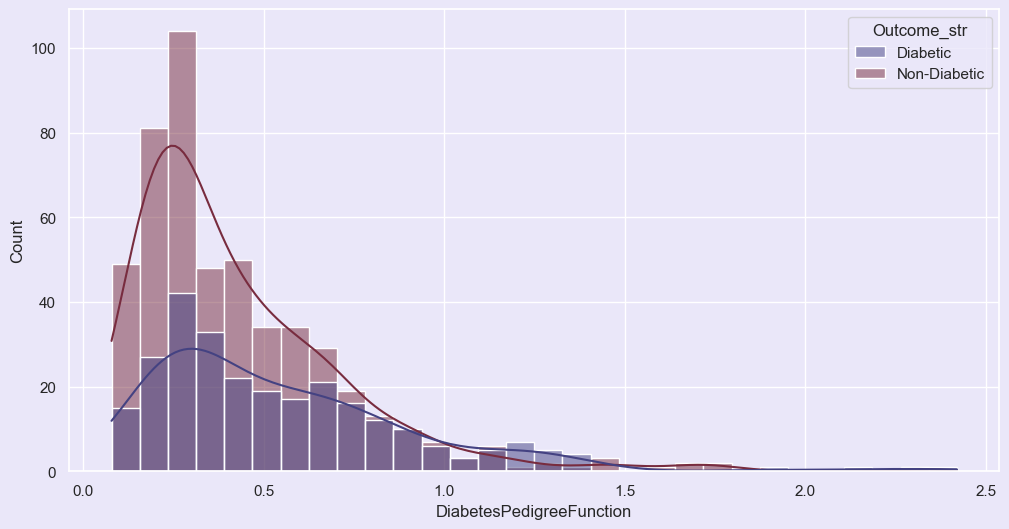

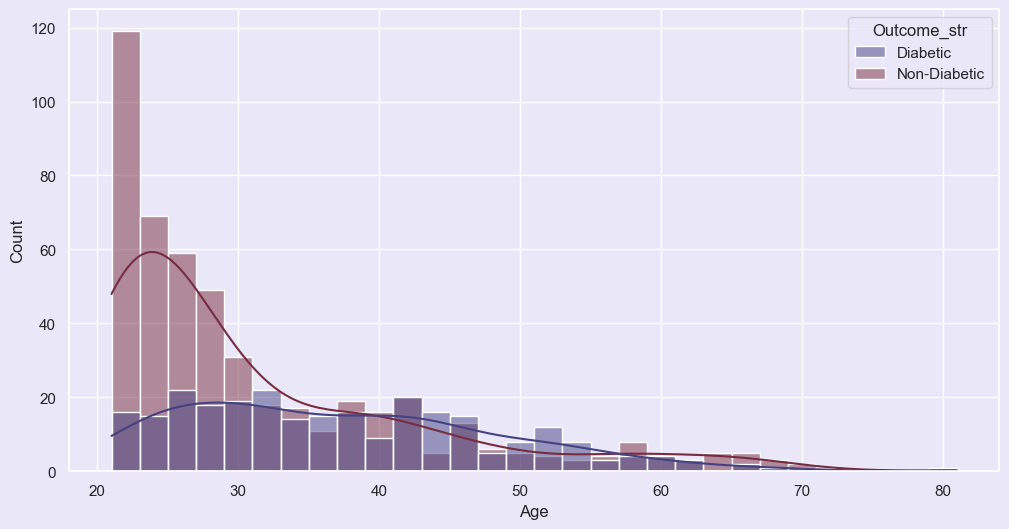

<class 'pandas.core.series.Series'>
Index: 5 entries, 75 to 502
Series name: Glucose
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes
<class 'pandas.core.series.Series'>
Index: 34 entries, 8 to 753
Series name: Insulin
Non-Null Count  Dtype
--------------  -----
34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes
<class 'pandas.core.series.Series'>
Index: 29 entries, 4 to 661
Series name: DiabetesPedigreeFunction
Non-Null Count  Dtype  
--------------  -----  
29 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes
<class 'pandas.core.series.Series'>
Index: 19 entries, 9 to 706
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 304.0 bytes
<class 'pandas.core.series.Series'>
Index: 45 entries, 7 to 706
Series name: BloodPressure
Non-Null Count  Dtype
--------------  -----
45 non-null     int64
dtypes: int64(1)
memory usage: 720.0 by

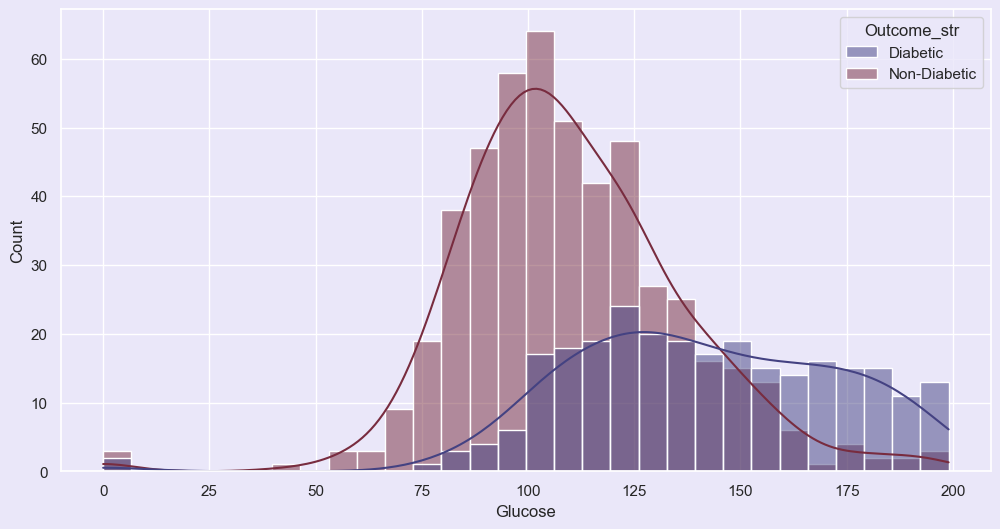

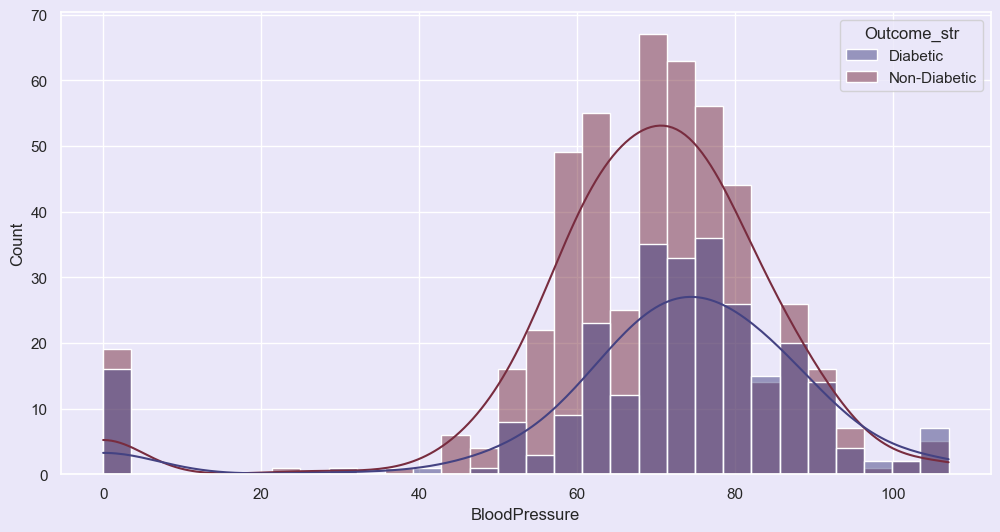

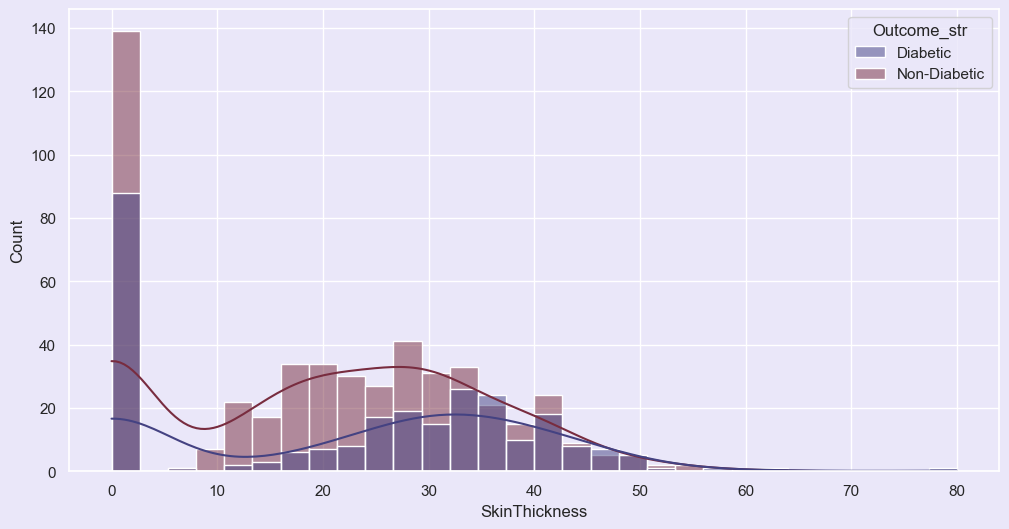

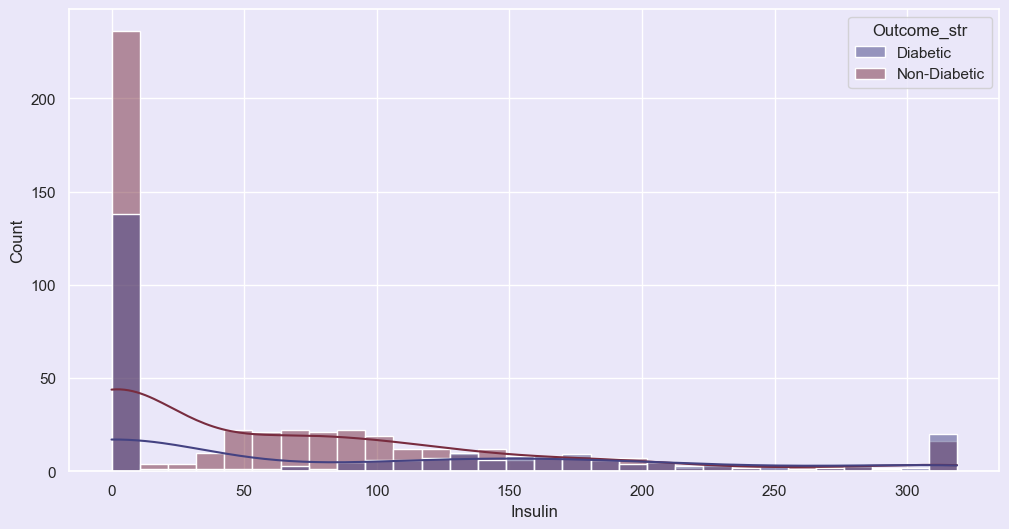

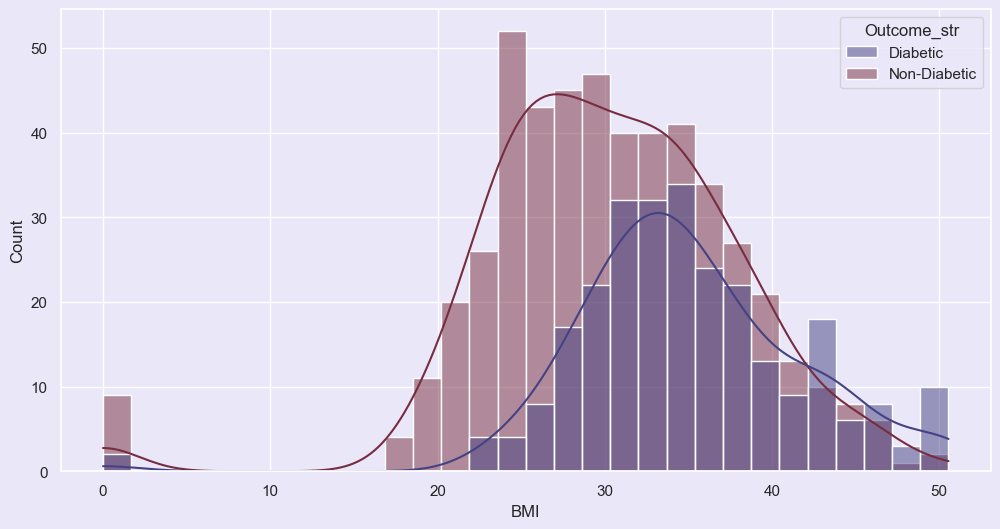

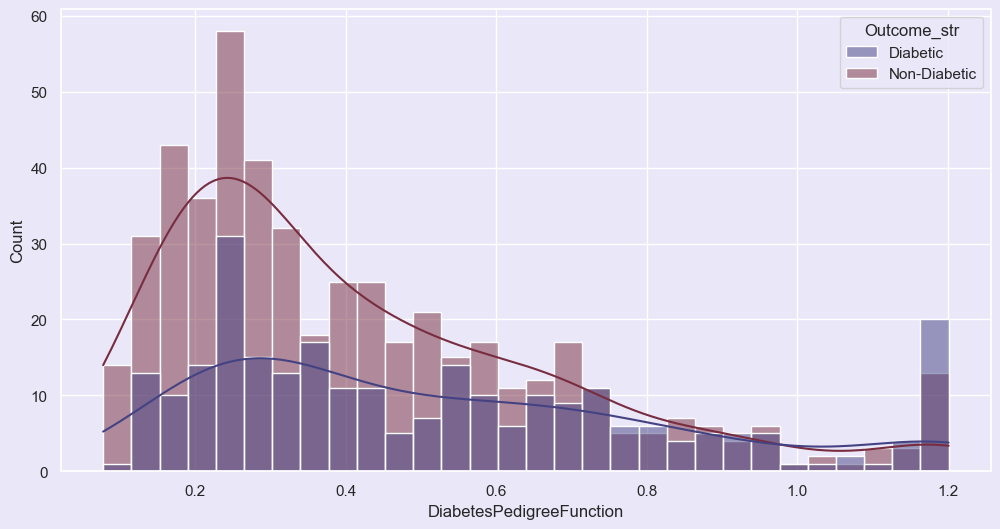

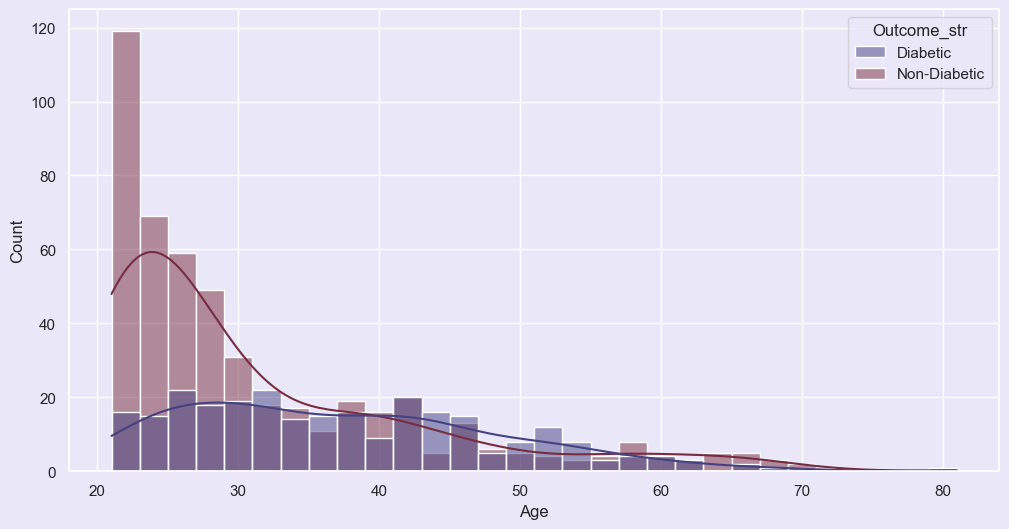

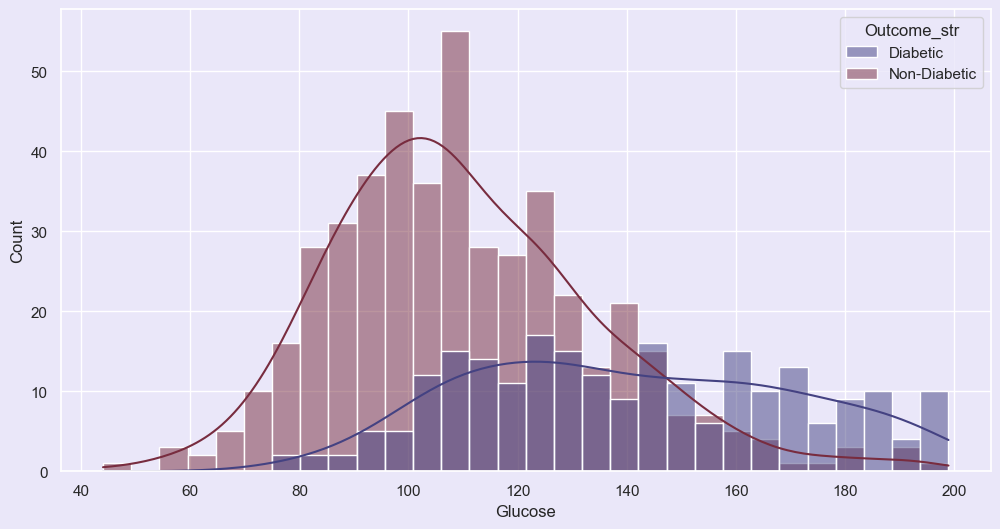

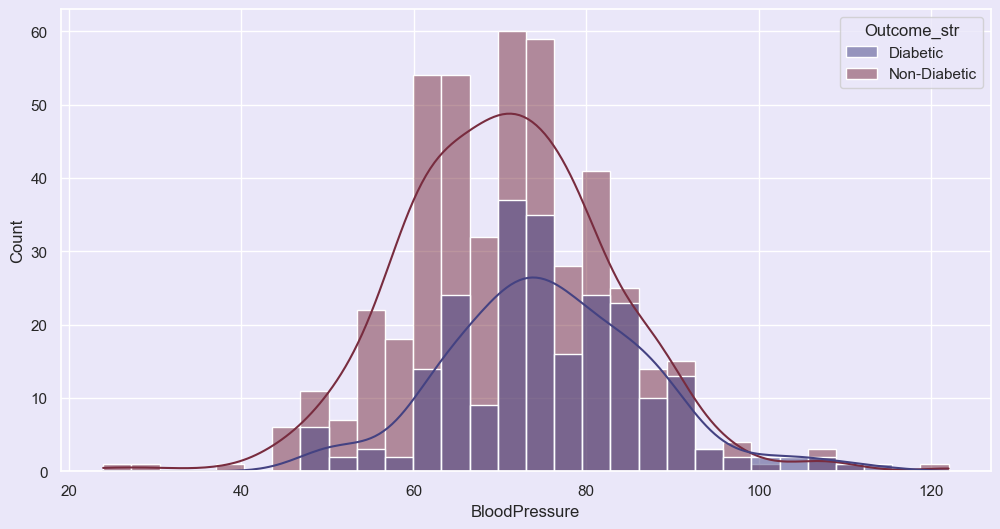

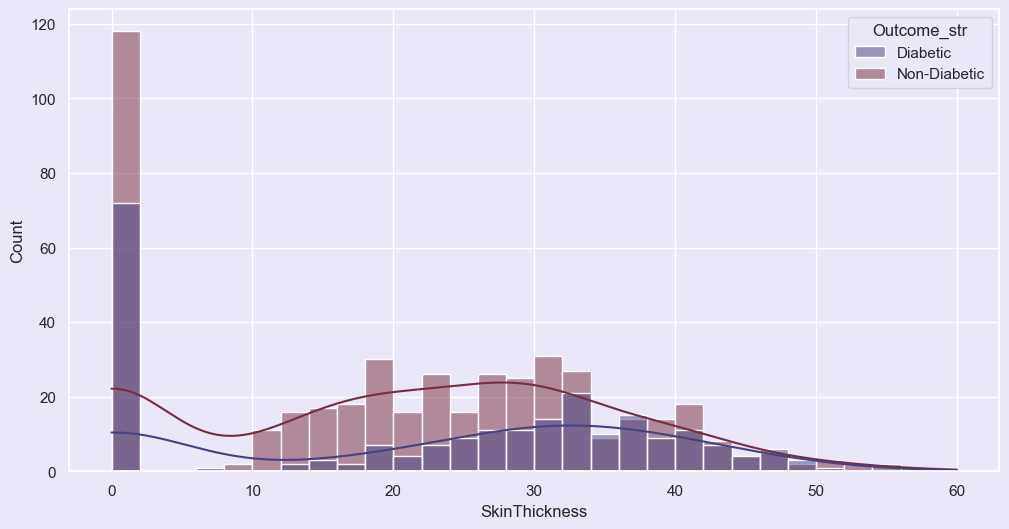

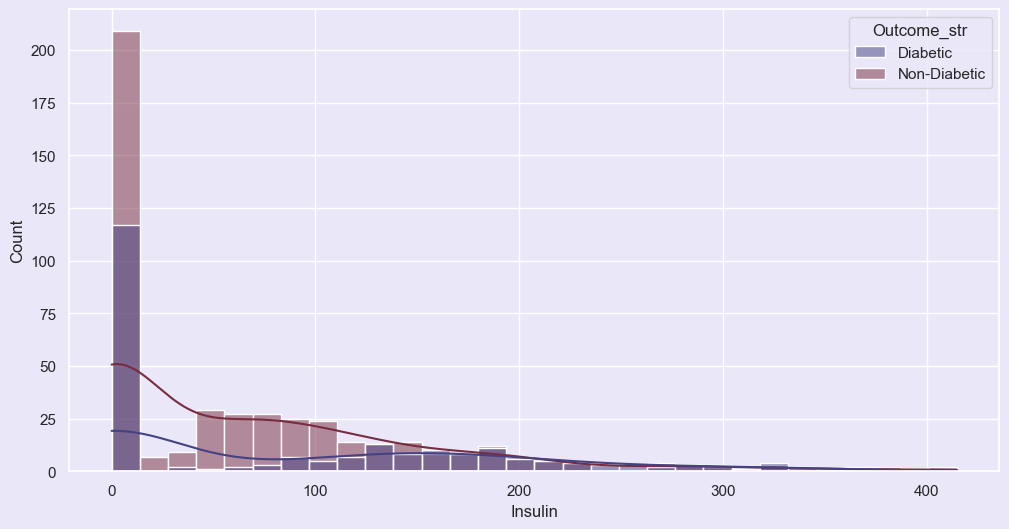

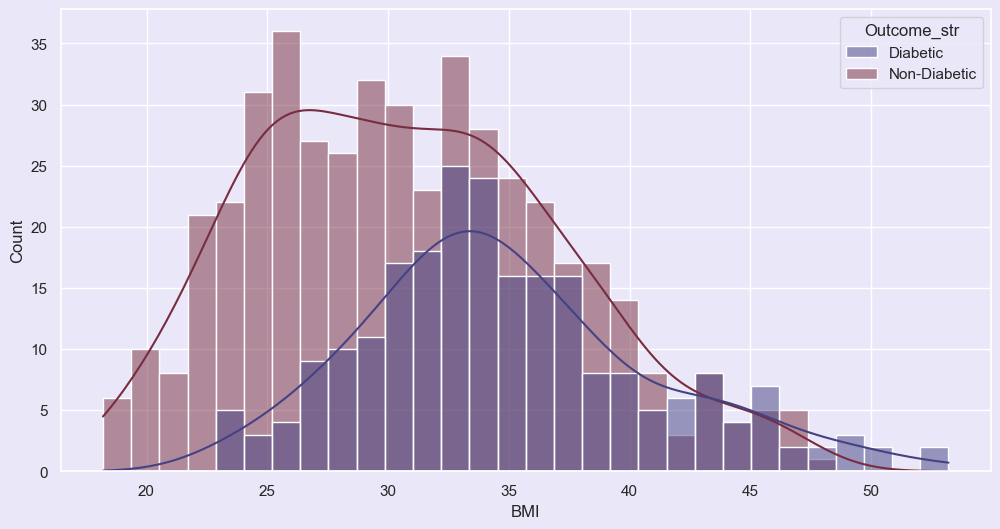

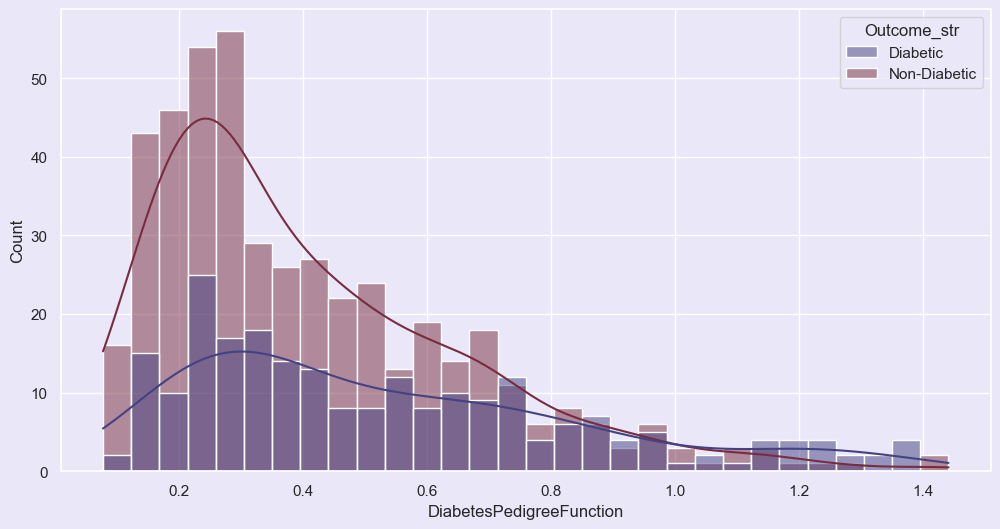

In [1]:
import import_ipynb
%run 03-EDA.ipynb


### Imports

In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier



import statsmodels.api as sm

<a id="10"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">10. | Model Development: CDC Data: XGBoost Classifier</div>

### Selected Features

In [4]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income']

<a id="10.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">10.1 | Model Development: CDC Data: XGBoost Classifier: First Iteration</div>

### Split Features and Target

In [5]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [6]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 11) (202944,)
(50736, 11) (50736,)


#### Train with XGBoost Classifier

In [7]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Predict Using XGBoost Classifier

In [8]:

predictions_train_xgb = model_xgb.predict(X_train)
predictions_test_xgb  = model_xgb.predict(X_test)

### XGBoost: Significant Variables

         Feature  Importance
0         HighBP    0.629667
4        GenHlth    0.162323
1       HighChol    0.069023
8            Age    0.037836
2            BMI    0.031315
7       DiffWalk    0.022294
10        Income    0.011964
9      Education    0.009111
5       MentHlth    0.008969
3   PhysActivity    0.008787
6       PhysHlth    0.008711


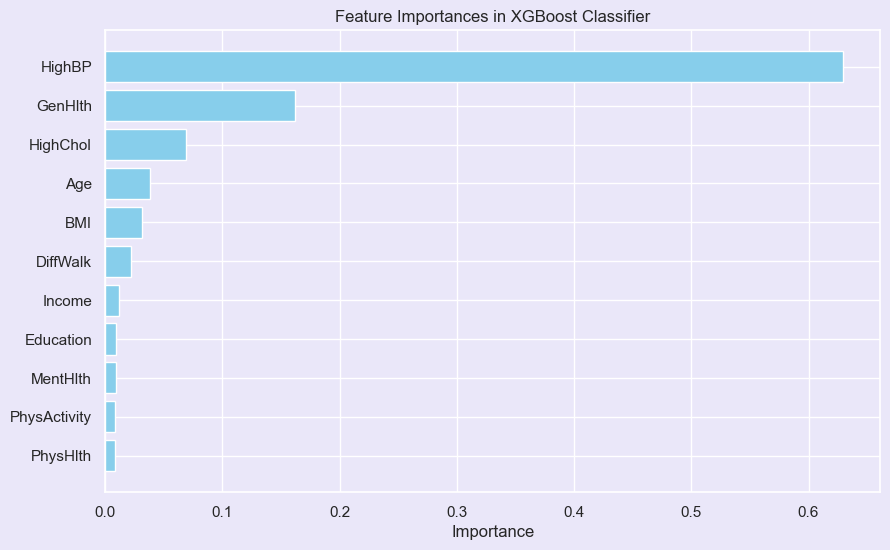

In [9]:
# Extract feature importances
feature_importances = model_xgb.feature_importances_

# Get feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in XGBoost Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

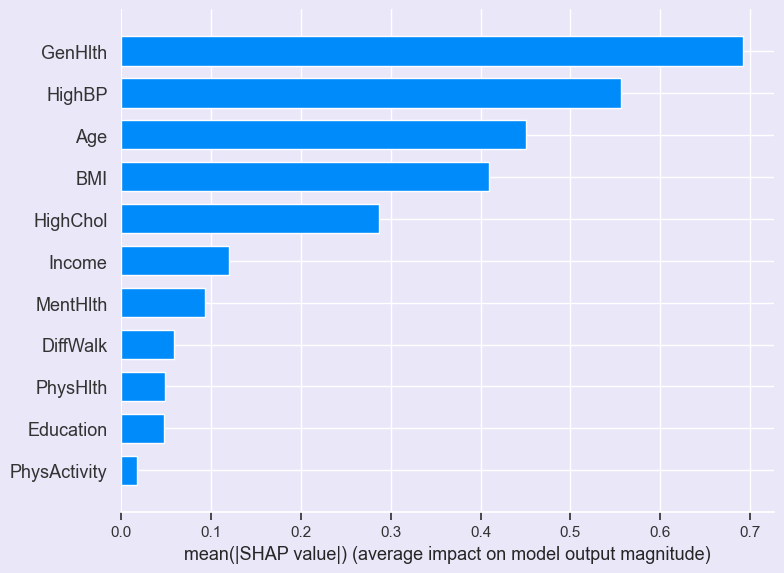

In [11]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

### XGBoost: Significant Variables : Interpretations

Key Influencers: 

HighBP and GenHlth are identified as the most significant features, 

suggesting that these health indicators are critical in the model's predictions.


Moderate Factors: 

Features like HighChol, Age, and BMI provide additional predictive power but are not as critical as the top features.


Less Influential Features: Income, Education, MentHlth, PhysActivity, and PhysHlth have minimal impact, 

indicating that they are less relevant in this model's predictions.
 
Implications:
 
Feature Selection: Focus on HighBP and GenHlth for further analysis, feature engineering, or interventions, as they hold the most predictive power.

#### Plot Confusion Matrix For XGBoost Classifier

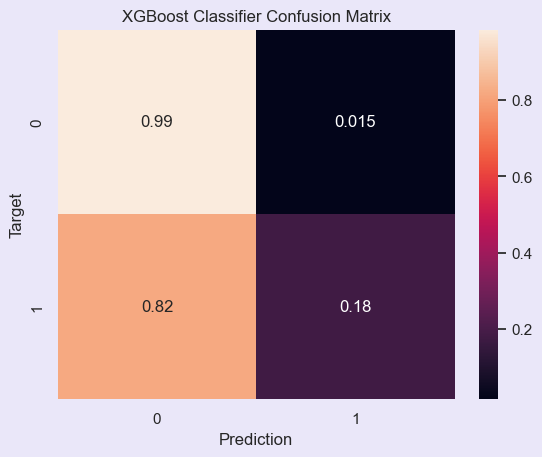

In [12]:
cf_xgb = confusion_matrix(y_train, predictions_train_xgb, normalize='true')
plt.figure()
sns.heatmap(cf_xgb, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("XGBoost Classifier"))
plt.show()

#### Calculate Evaluation Metrics for XGBoost Classifier

In [13]:
# Training set performance
xgb_train_accuracy = accuracy_score(y_train, predictions_train_xgb) # Calculate Accuracy
xgb_train_f1 = f1_score(y_train, predictions_train_xgb) # Calculate F1-score
xgb_train_precision = precision_score(y_train, predictions_train_xgb) # Calculate Precision
xgb_train_recall = recall_score(y_train, predictions_train_xgb) # Calculate Recall
xgb_train_rocauc_score = roc_auc_score(y_train, predictions_train_xgb)
xgb_train_log_loss_value = log_loss(y_train, predictions_train_xgb)


# Test set performance
xgb_test_accuracy = accuracy_score(y_test, predictions_test_xgb) # Calculate Accuracy
xgb_test_f1 = f1_score(y_test, predictions_test_xgb) # Calculate F1-score
xgb_test_precision = precision_score(y_test, predictions_test_xgb) # Calculate Precision
xgb_test_recall = recall_score(y_test, predictions_test_xgb) # Calculate Recall
xgb_test_rocauc_score = roc_auc_score(y_test, predictions_test_xgb) #Calculate Roc
xgb_test_log_loss_value = log_loss(y_test, predictions_test_xgb)

print('XGB: Model performance for Training set')
print("- Accuracy: {:.4f}".format(xgb_train_accuracy))
print('- F1 score: {:.4f}'.format(xgb_train_f1))
print('- Precision: {:.4f}'.format(xgb_train_precision))
print('- Recall: {:.4f}'.format(xgb_train_recall))
print('- Roc Auc Score: {:.4f}'.format(xgb_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(xgb_train_log_loss_value))

    
    
print('----------------------------------')
    
print('XGB: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(xgb_test_accuracy))
print('- F1 score: {:.4f}'.format(xgb_test_f1))
print('- Precision: {:.4f}'.format(xgb_test_precision))
print('- Recall: {:.4f}'.format(xgb_test_recall))
print('- Roc Auc Score: {:.4f}'.format(xgb_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(xgb_test_log_loss_value))

    
print('='*35)
print('\n')

XGB: Model performance for Training set
- Accuracy: 0.8727
- F1 score: 0.2828
- Precision: 0.6644
- Recall: 0.1796
- Roc Auc Score: 0.5824
- Log Loss: 4.5873
----------------------------------
XGB: Model performance for Test set
- Accuracy: 0.8653
- F1 score: 0.2372
- Precision: 0.5410
- Recall: 0.1519
- Roc Auc Score: 0.5656
- Log Loss: 4.8564




#### XGB: Classification Report


In [14]:
cm_xgb_train = classification_report(y_train,predictions_train_xgb)

print('XGB Model: Train\n')
print(cm_xgb_train)

cm_xgb_test = classification_report(y_test,predictions_test_xgb)

print('XGB Model: Test\n')
print(cm_xgb_test)

XGB Model: Train

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    174595
         1.0       0.66      0.18      0.28     28349

    accuracy                           0.87    202944
   macro avg       0.77      0.58      0.61    202944
weighted avg       0.85      0.87      0.84    202944

XGB Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.15      0.24      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



#### XGB: N-fold cross-validation

In [15]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_xgb.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_xgb_kfold = model_xgb.predict(X_train_kfold)
    pred_test_xgb_kfold = model_xgb.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_xgb_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_xgb_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_xgb_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_xgb_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_xgb_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_xgb_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_xgb_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy = np.mean(training_accuracies)
std_train_accuracy = np.std(training_accuracies)
mean_test_accuracy = np.mean(testing_accuracies)
std_test_accuracy = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy:.2f} ± {std_train_accuracy:.2f}")
print(f"Test Accuracy: {mean_test_accuracy:.2f} ± {std_test_accuracy:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1 = np.mean(training_f1)
std_train_f1 = np.std(training_f1)
mean_test_f1 = np.mean(testing_f1)
std_test_f1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1:.2f} ± {std_train_f1:.2f}")
print(f"Test F1: {mean_test_f1:.2f} ± {std_test_f1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision = np.mean(training_precision)
std_train_precision = np.std(training_precision)
mean_test_precision = np.mean(testing_precision)
std_test_precision = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision:.2f} ± {std_train_precision:.2f}")
print(f"Test Precision: {mean_test_precision:.2f} ± {std_test_precision:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall = np.mean(training_recall)
std_train_recall = np.std(training_recall)
mean_test_recall = np.mean(testing_recall)
std_test_recall = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall:.2f} ± {std_train_recall:.2f}")
print(f"Test Recall: {mean_test_recall:.2f} ± {std_test_recall:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score = np.mean(training_rocauc_score)
std_train_rocauc_score = np.std(training_rocauc_score)
mean_test_rocauc_score = np.mean(testing_rocauc_score)
std_test_rocauc_score = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score:.2f} ± {std_train_rocauc_score:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score:.2f} ± {std_test_rocauc_score:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value = np.mean(training_log_loss_value)
std_train_log_loss_value = np.std(training_log_loss_value)
mean_test_log_loss_value = np.mean(testing_log_loss_value)
std_test_log_loss_value = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value:.2f} ± {std_train_log_loss_value:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value:.2f} ± {std_test_log_loss_value:.2f}")
print("="*50)





Training Accuracy: 0.87 ± 0.00
Test Accuracy: 0.86 ± 0.00


Training F1: 0.29 ± 0.01
Test F1: 0.24 ± 0.00


Training Precision: 0.66 ± 0.00
Test Precision: 0.55 ± 0.01


Training Recall: 0.19 ± 0.00
Test Recall: 0.15 ± 0.00


Training RO-AUC: 0.59 ± 0.00
Test RO-AUC: 0.57 ± 0.00


Training Log Loss: 4.56 ± 0.01
Test Log Loss: 4.88 ± 0.02


<a id="10.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">10.1 | Model Development: CDC Data: XGBoost Classifier: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>



Training Accuracy: 0.87 ± 0.00 : Test Accuracy: 0.86 ± 0.00

Training F1: 0.29 ± 0.01 : Test F1: 0.24 ± 0.00

Training Precision: 0.66 ± 0.00 : Test Precision: 0.55 ± 0.01

Training Recall: 0.19 ± 0.00 : Test Recall: 0.15 ± 0.00

Training RO-AUC: 0.59 ± 0.00 : Test RO-AUC: 0.57 ± 0.00

Training Log Loss: 4.56 ± 0.01 : Test Log Loss: 4.88 ± 0.02


</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Class Imbalance: 

The disparity between accuracy and F1 score, recall, and ROC AUC suggests that the dataset may be imbalanced. 

The model might be biased towards predicting the majority class.


Model Sensitivity: 

The low recall and F1 score indicate that the model is not sensitive enough to capture the minority class, leading to high false negative rates.


Probability Calibration: 

The high log loss values indicate that the model's probability estimates are not well-calibrated, suggesting a lack of confidence in predictions.
 
Recommendations for Improvement:
 
Address Class Imbalance:


Consider techniques such as resampling, SMOTE, or adjusting class weights to improve model sensitivity to the minority class.

Feature Engineering and Selection:

Explore feature engineering or selection to enhance the model's ability to capture relevant patterns.

Hyperparameter Tuning:

Experiment with different hyperparameters (e.g., learning rate, number of estimators, max depth) to optimize model performance.

Cross-Validation:

Use cross-validation to better estimate generalization performance and avoid overfitting.



</div>



<a id="10.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">10.2 | Model Development: CDC Data: XGBoost: Second Iteration</div>

XGBoost is a robust and versatile model that offers significant advantages, especially when dealing with complex datasets and class imbalance. 

By leveraging its flexibility, feature importance insights, and robust handling of non-linear relationships, 

XGBoost can achieve strong performance and provide valuable insights into your machine learning tasks. 

Addressing the specific challenges highlighted through tuning and data preprocessing can further enhance its effectiveness.